In [69]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [71]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [72]:
repos = ['frontend',
         'gateway',
         'etl_tse',
         'etl_twitter',
         'etl_camara',
         'etl_news']

language = [['frontend', 'js'],
            ['gateway', 'py'],
            ['etl_tse', 'py'],
            ['etl_twitter', 'py'],
            ['etl_camara', 'py'],
            ['etl_news', 'py']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [73]:
jsons = glob('data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/*.json')

In [74]:
jsons

['data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_camara-10-05-2021(1).json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-gateway-09-05-2021(2).json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_camara-04-05-2021.json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_camara-09-05-2021(1).json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_twitter-10-05-2021(1).json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_tse-19-05-2021.json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-etl_news-09-05-2021(2).json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-frontend-04-05-2021.json',
 'data/fga-eps-mds-2020-2-data/parlamentaqui/analytics-raw-data/fga-eps-mds-2020_2-gateway-19-05-2

In [75]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [76]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [77]:
base_component_df = create_base_component_df(jsons)

In [78]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
508,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
509,functions,30,NaN,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
510,security_rating,3.0,False,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
511,files,5,NaN,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
512,complexity,88,NaN,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
513,ncloc,525,NaN,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
514,coverage,0.0,False,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
515,reliability_rating,1.0,True,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
516,comment_lines_density,9.2,False,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
106,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021


In [79]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [80]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [81]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [82]:
def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [83]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)

        file_repository = file_name.split("-", 5)[4]
        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list,
                                                                file_component_data,
                                                                language_extension = file_language)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)

    # replace TeamName by yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [84]:
file_component_df = create_file_df(jsons)

In [85]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
560,src/api/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
561,src/etl/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
562,src/api/api.py,25,82,13.1,0.0,0.0,345,3.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
563,src/app.py,1,2,0.0,0.0,0.0,20,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
564,src/models.py,4,4,0.6,0.0,0.0,160,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-01-05-2021.json,etl_camara,01-05-2021
95,src/api/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021
96,src/etl/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021
97,src/api/api.py,25,82,13.1,0.0,0.0,345,3.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021
98,src/app.py,1,2,0.0,0.0,0.0,20,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021
99,src/models.py,4,4,0.6,0.0,0.0,160,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-etl_camara-02-05-2021.json,etl_camara,02-05-2021


In [86]:
# Create dataframe per repository

repository_dataframes = {}

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()

dict_keys(['frontend', 'gateway', 'etl_tse', 'etl_twitter', 'etl_camara', 'etl_news'])

#### COMPLEXITY

In [87]:
def m1(df):

    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return density_non_complex_files

#### COMMENTS

In [88]:
def m2(df):

    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return density_comment_files

#### DUPLICATIONS

In [89]:
def m3(df):

    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)

    return duplication

In [90]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)

    return ncloc

In [91]:
# Calculating m1, m2 and m3 for each repository

def create_metrics_df(df):

    version_vec = df['version'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [92]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [93]:
repository_dataframes["frontend"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
593,src/Api.js,3,4,0.0,0.0,0.0,15,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
594,src/App.js,1,1,0.0,0.0,0.0,32,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
595,src/components/Breadcrumbs/tests/breadcrumbs.t...,1,1,0.0,0.0,0.0,15,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
596,src/components/DataVoting/DataVoting.js,5,8,4.5,0.0,0.0,107,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
597,src/components/DataVoting/DataVotingMobile.js,4,4,0.0,0.0,0.0,74,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
598,src/components/DeputiesList/DeputiesList.js,2,2,0.0,0.0,0.0,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
599,src/screens/DeputiesScreen.js,1,1,0.0,0.0,0.0,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
600,src/screens/DeputyProfileScreen.js,4,4,5.2,0.0,0.0,55,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
601,src/screens/ErrorScreen.js,1,1,0.0,0.0,0.0,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021
602,src/index.js,0,0,0.0,0.0,0.0,13,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-01-05-2021.json,frontend,01-05-2021


In [94]:
repository_metrics["frontend"]

,m1,m2,m3,repository,version
0,0.966667,0.066667,1.000000,frontend,01-05-2021
1,0.966667,0.066667,1.000000,frontend,02-05-2021
2,0.966667,0.100000,1.000000,frontend,04-05-2021
3,0.968750,0.093750,0.937500,frontend,09-05-2021
4,0.968750,0.093750,0.937500,frontend,09-05-2021(1)
5,0.968750,0.093750,0.937500,frontend,09-05-2021(2)
6,0.968750,0.062500,0.937500,frontend,10-05-2021
7,0.971429,0.057143,0.971429,frontend,10-05-2021(1)
8,0.964286,0.107143,1.000000,frontend,18-04-2021
9,0.972973,0.054054,0.972973,frontend,19-05-2021


In [95]:
repository_metrics["gateway"]

,m1,m2,m3,repository,version
0,0.555556,0.0,1.0,gateway,01-05-2021
1,0.555556,0.0,1.0,gateway,02-05-2021
2,0.555556,0.0,1.0,gateway,04-05-2021
3,0.555556,0.0,1.0,gateway,09-05-2021
4,0.555556,0.0,1.0,gateway,09-05-2021(1)
5,0.555556,0.0,1.0,gateway,09-05-2021(2)
6,0.555556,0.0,1.0,gateway,10-05-2021
7,0.555556,0.0,1.0,gateway,10-05-2021(1)
8,0.555556,0.0,1.0,gateway,18-04-2021
9,0.600000,0.0,1.0,gateway,19-05-2021


In [96]:
repository_metrics["etl_tse"]

,m1,m2,m3,repository,version
0,0.600000,0.0,1.0,etl_tse,01-05-2021
1,0.600000,0.0,1.0,etl_tse,02-05-2021
2,0.600000,0.0,1.0,etl_tse,04-05-2021
3,0.600000,0.0,1.0,etl_tse,09-05-2021
4,0.600000,0.0,1.0,etl_tse,09-05-2021(1)
5,0.600000,0.0,1.0,etl_tse,09-05-2021(2)
6,0.600000,0.0,1.0,etl_tse,10-05-2021
7,0.600000,0.0,1.0,etl_tse,10-05-2021(1)
8,0.600000,0.0,1.0,etl_tse,18-04-2021
9,0.666667,0.0,1.0,etl_tse,19-05-2021


In [97]:
repository_metrics["etl_twitter"]

,m1,m2,m3,repository,version
0,0.600000,0.4,1.0,etl_twitter,01-05-2021
1,0.600000,0.4,1.0,etl_twitter,02-05-2021
2,0.600000,0.4,1.0,etl_twitter,04-05-2021
3,0.600000,0.4,1.0,etl_twitter,09-05-2021
4,0.600000,0.2,1.0,etl_twitter,09-05-2021(1)
5,0.600000,0.2,1.0,etl_twitter,09-05-2021(2)
6,0.600000,0.2,1.0,etl_twitter,10-05-2021
7,0.600000,0.2,1.0,etl_twitter,10-05-2021(1)
8,0.600000,0.4,1.0,etl_twitter,18-04-2021
9,0.666667,0.0,1.0,etl_twitter,19-05-2021


In [98]:
repository_metrics["etl_camara"]

,m1,m2,m3,repository,version
0,0.600000,0.200000,1.0,etl_camara,01-05-2021
1,0.600000,0.200000,1.0,etl_camara,02-05-2021
2,0.600000,0.200000,1.0,etl_camara,04-05-2021
3,0.600000,0.200000,1.0,etl_camara,09-05-2021
4,0.600000,0.200000,1.0,etl_camara,09-05-2021(1)
5,0.600000,0.200000,1.0,etl_camara,09-05-2021(2)
6,0.600000,0.200000,1.0,etl_camara,10-05-2021
7,0.600000,0.200000,1.0,etl_camara,10-05-2021(1)
8,0.600000,0.200000,1.0,etl_camara,18-04-2021
9,0.666667,0.166667,1.0,etl_camara,19-05-2021


In [99]:
repository_metrics["etl_news"]

,m1,m2,m3,repository,version
0,0.600000,0.200000,1.0,etl_news,01-05-2021
1,0.600000,0.200000,1.0,etl_news,02-05-2021
2,0.600000,0.200000,1.0,etl_news,04-05-2021
3,0.600000,0.200000,1.0,etl_news,09-05-2021
4,0.600000,0.200000,1.0,etl_news,09-05-2021(1)
5,0.600000,0.200000,1.0,etl_news,09-05-2021(2)
6,0.600000,0.200000,1.0,etl_news,10-05-2021
7,0.600000,0.200000,1.0,etl_news,10-05-2021(1)
8,0.600000,0.200000,1.0,etl_news,18-04-2021
9,0.666667,0.166667,1.0,etl_news,19-05-2021


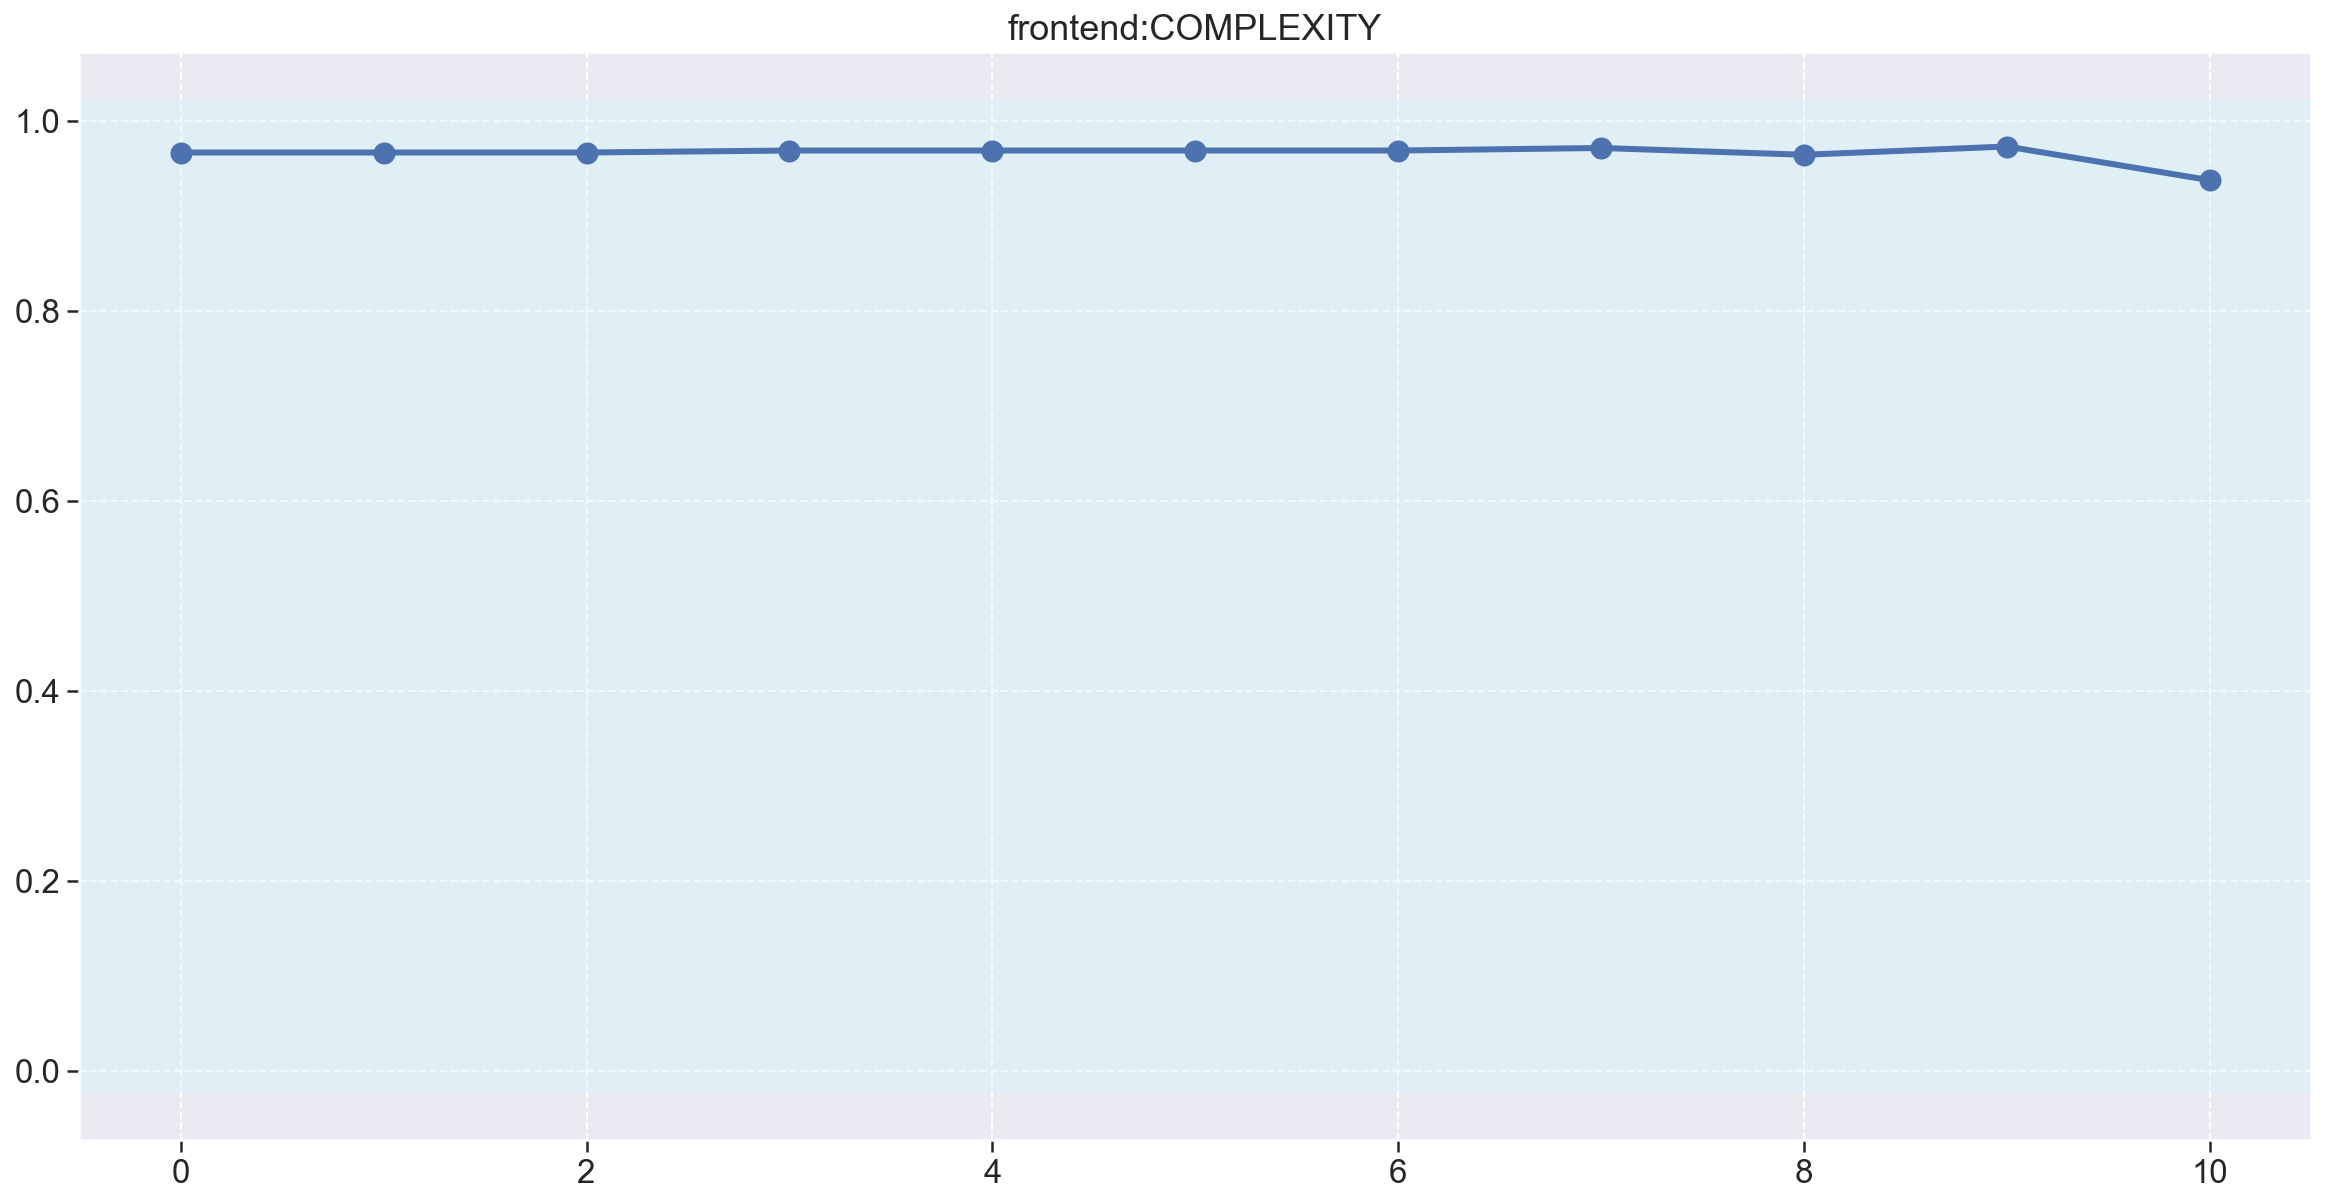

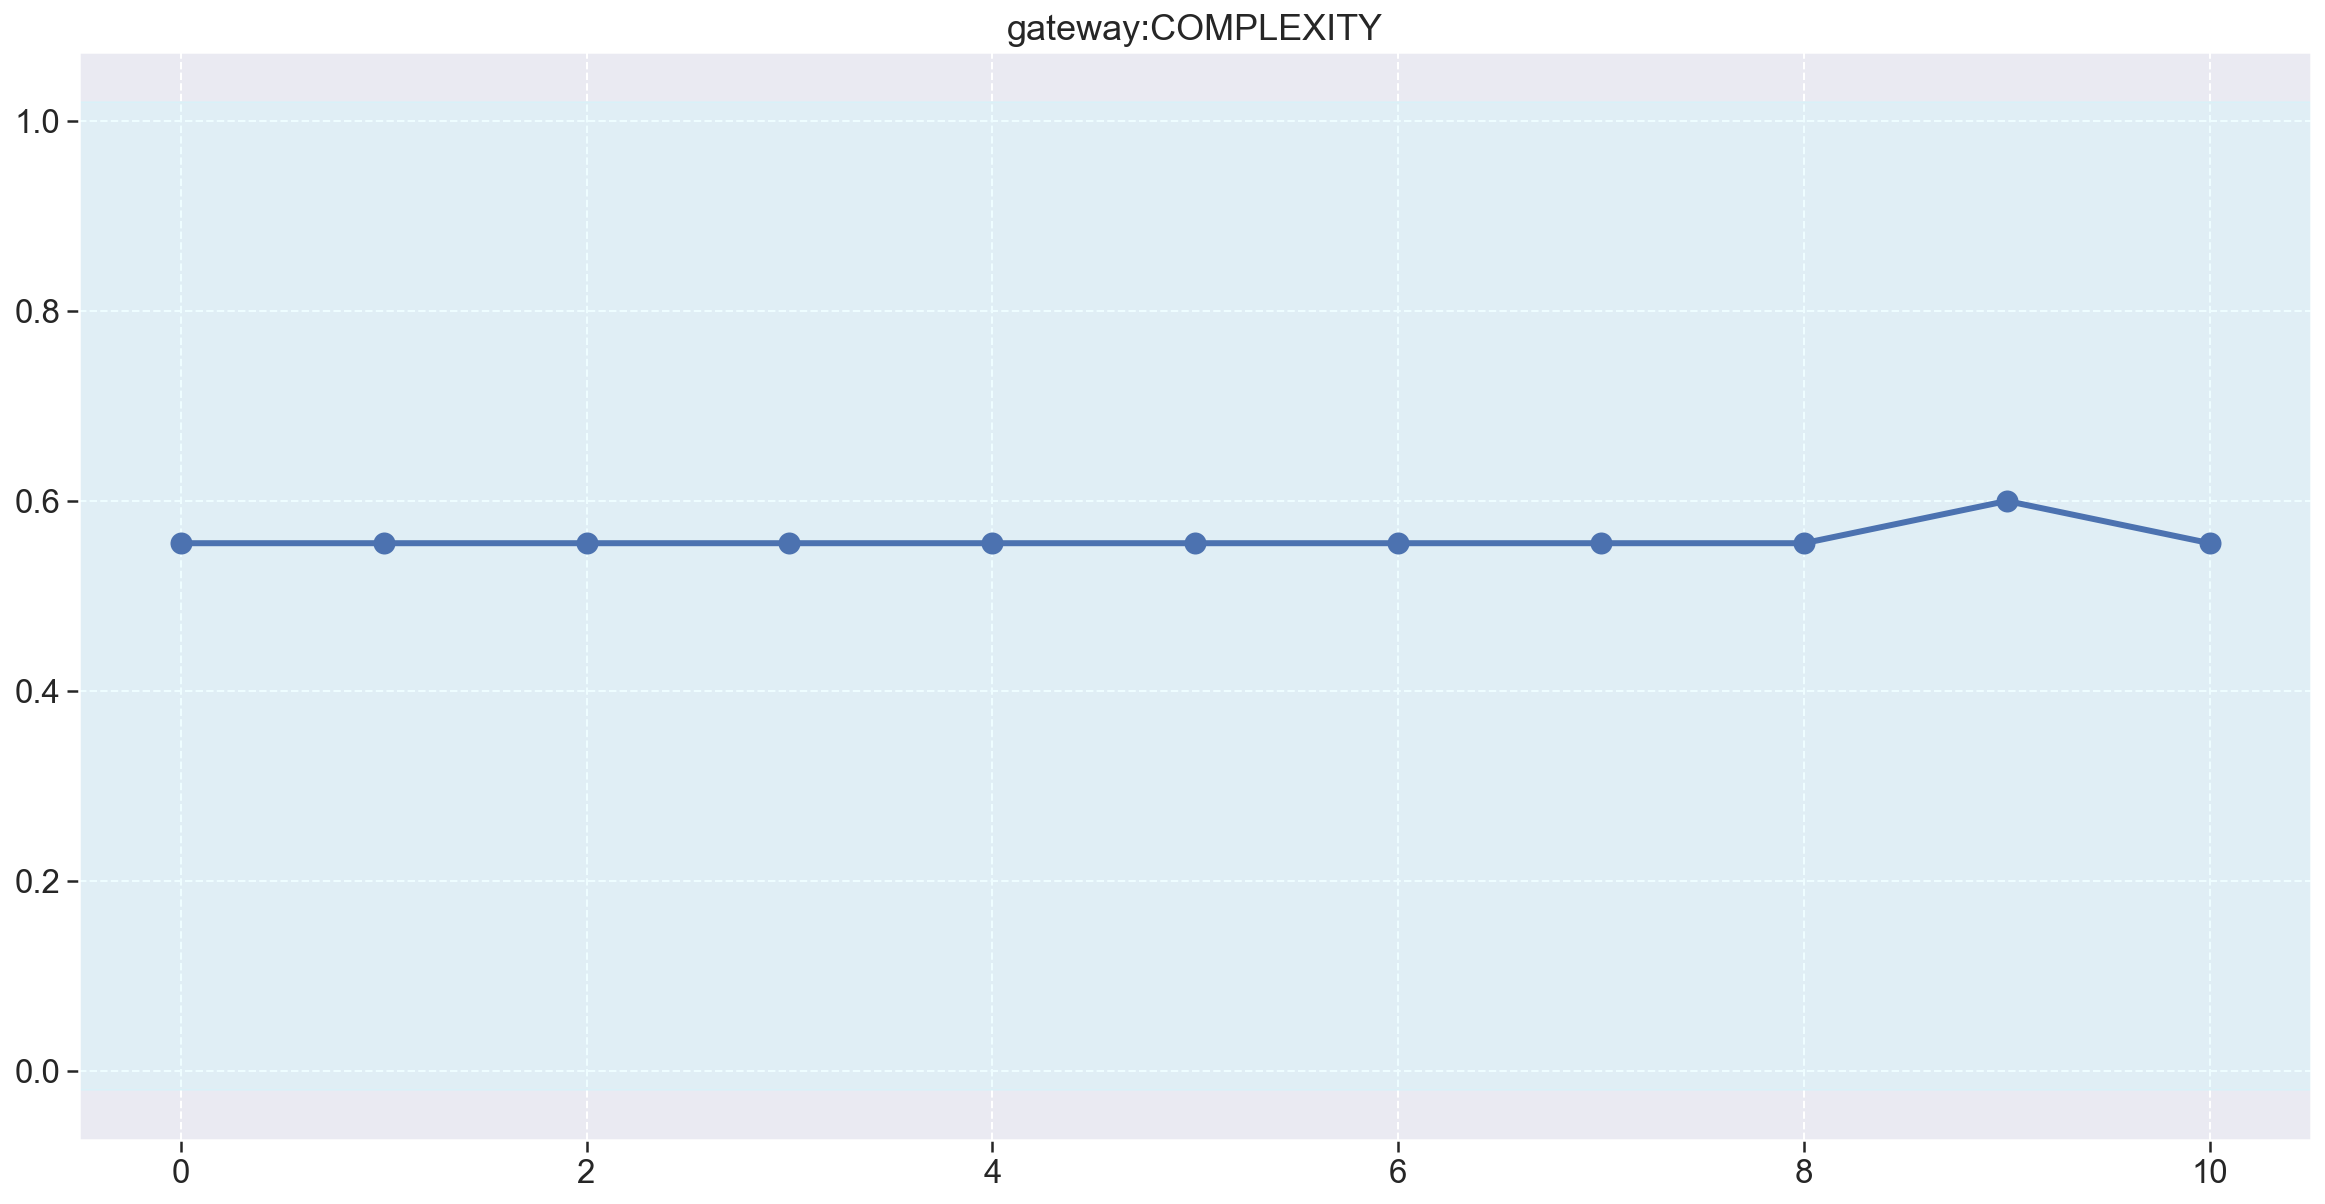

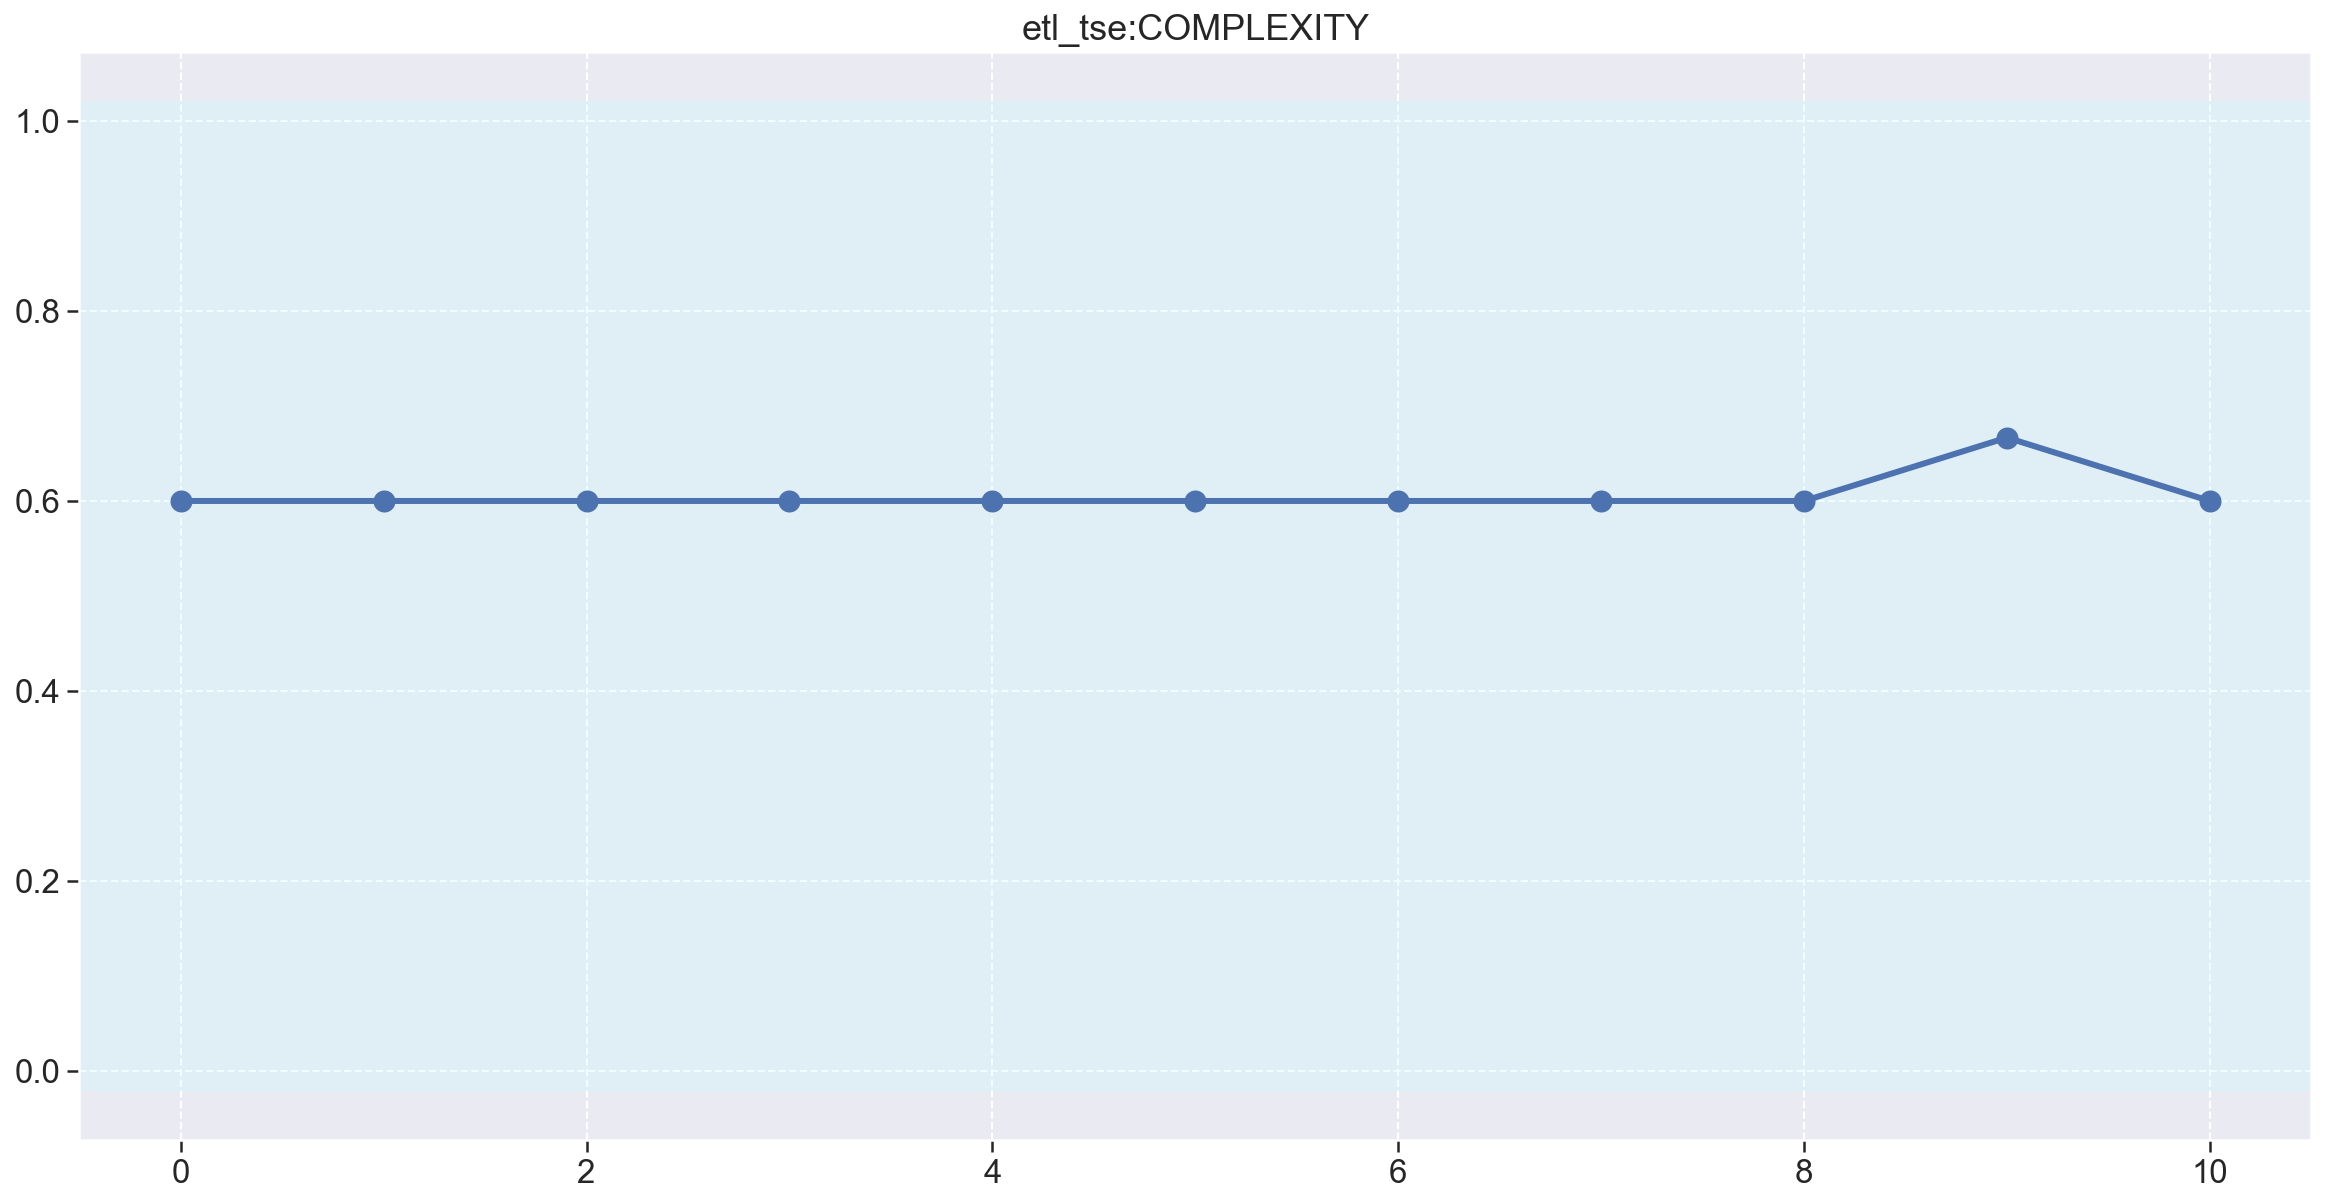

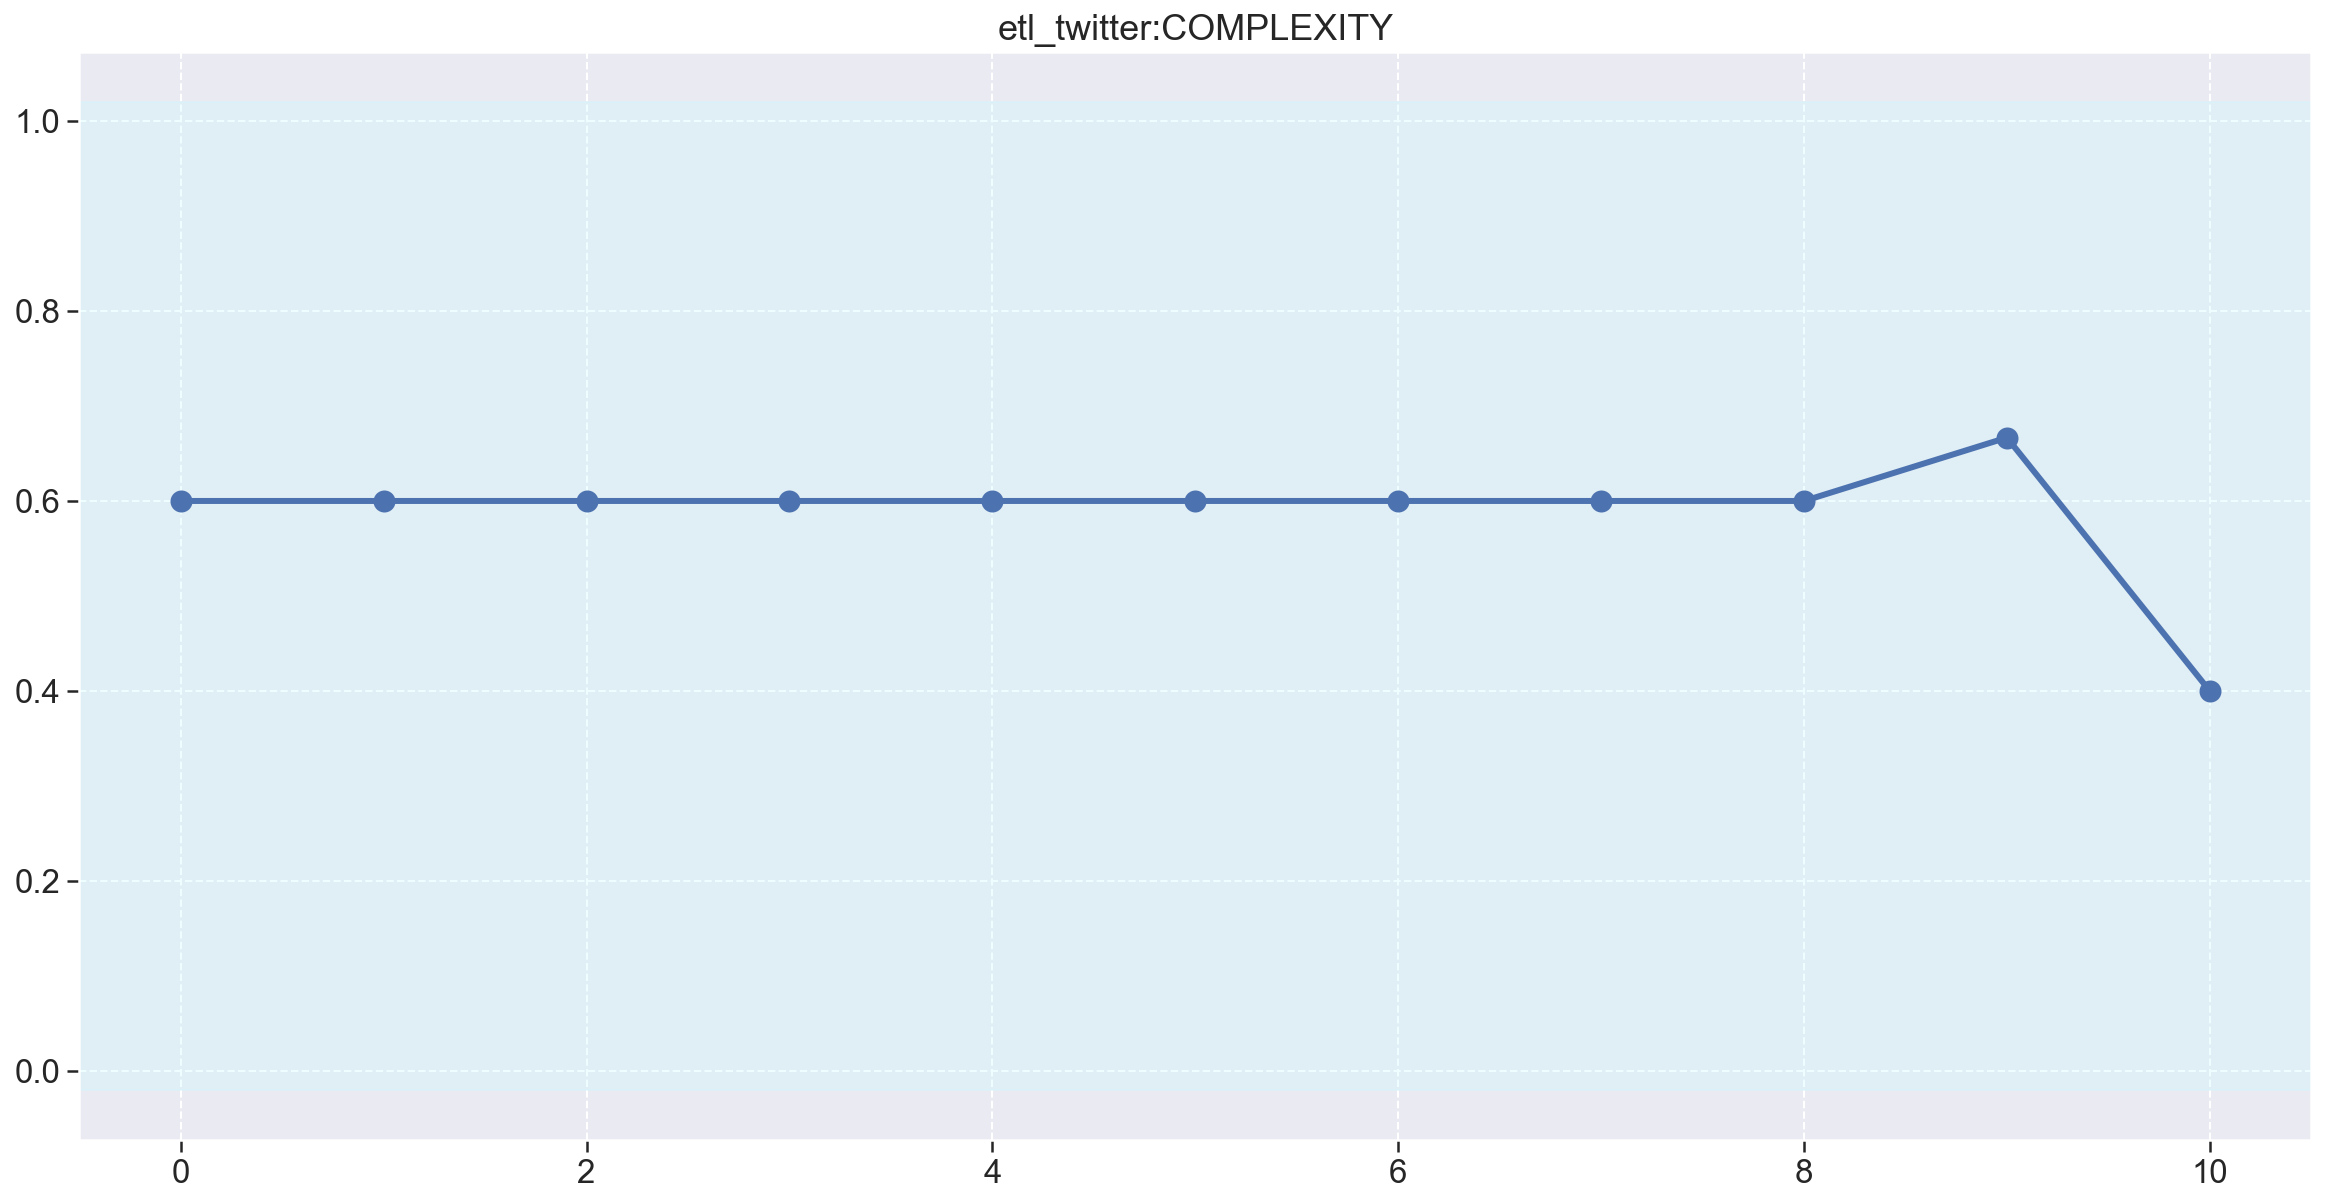

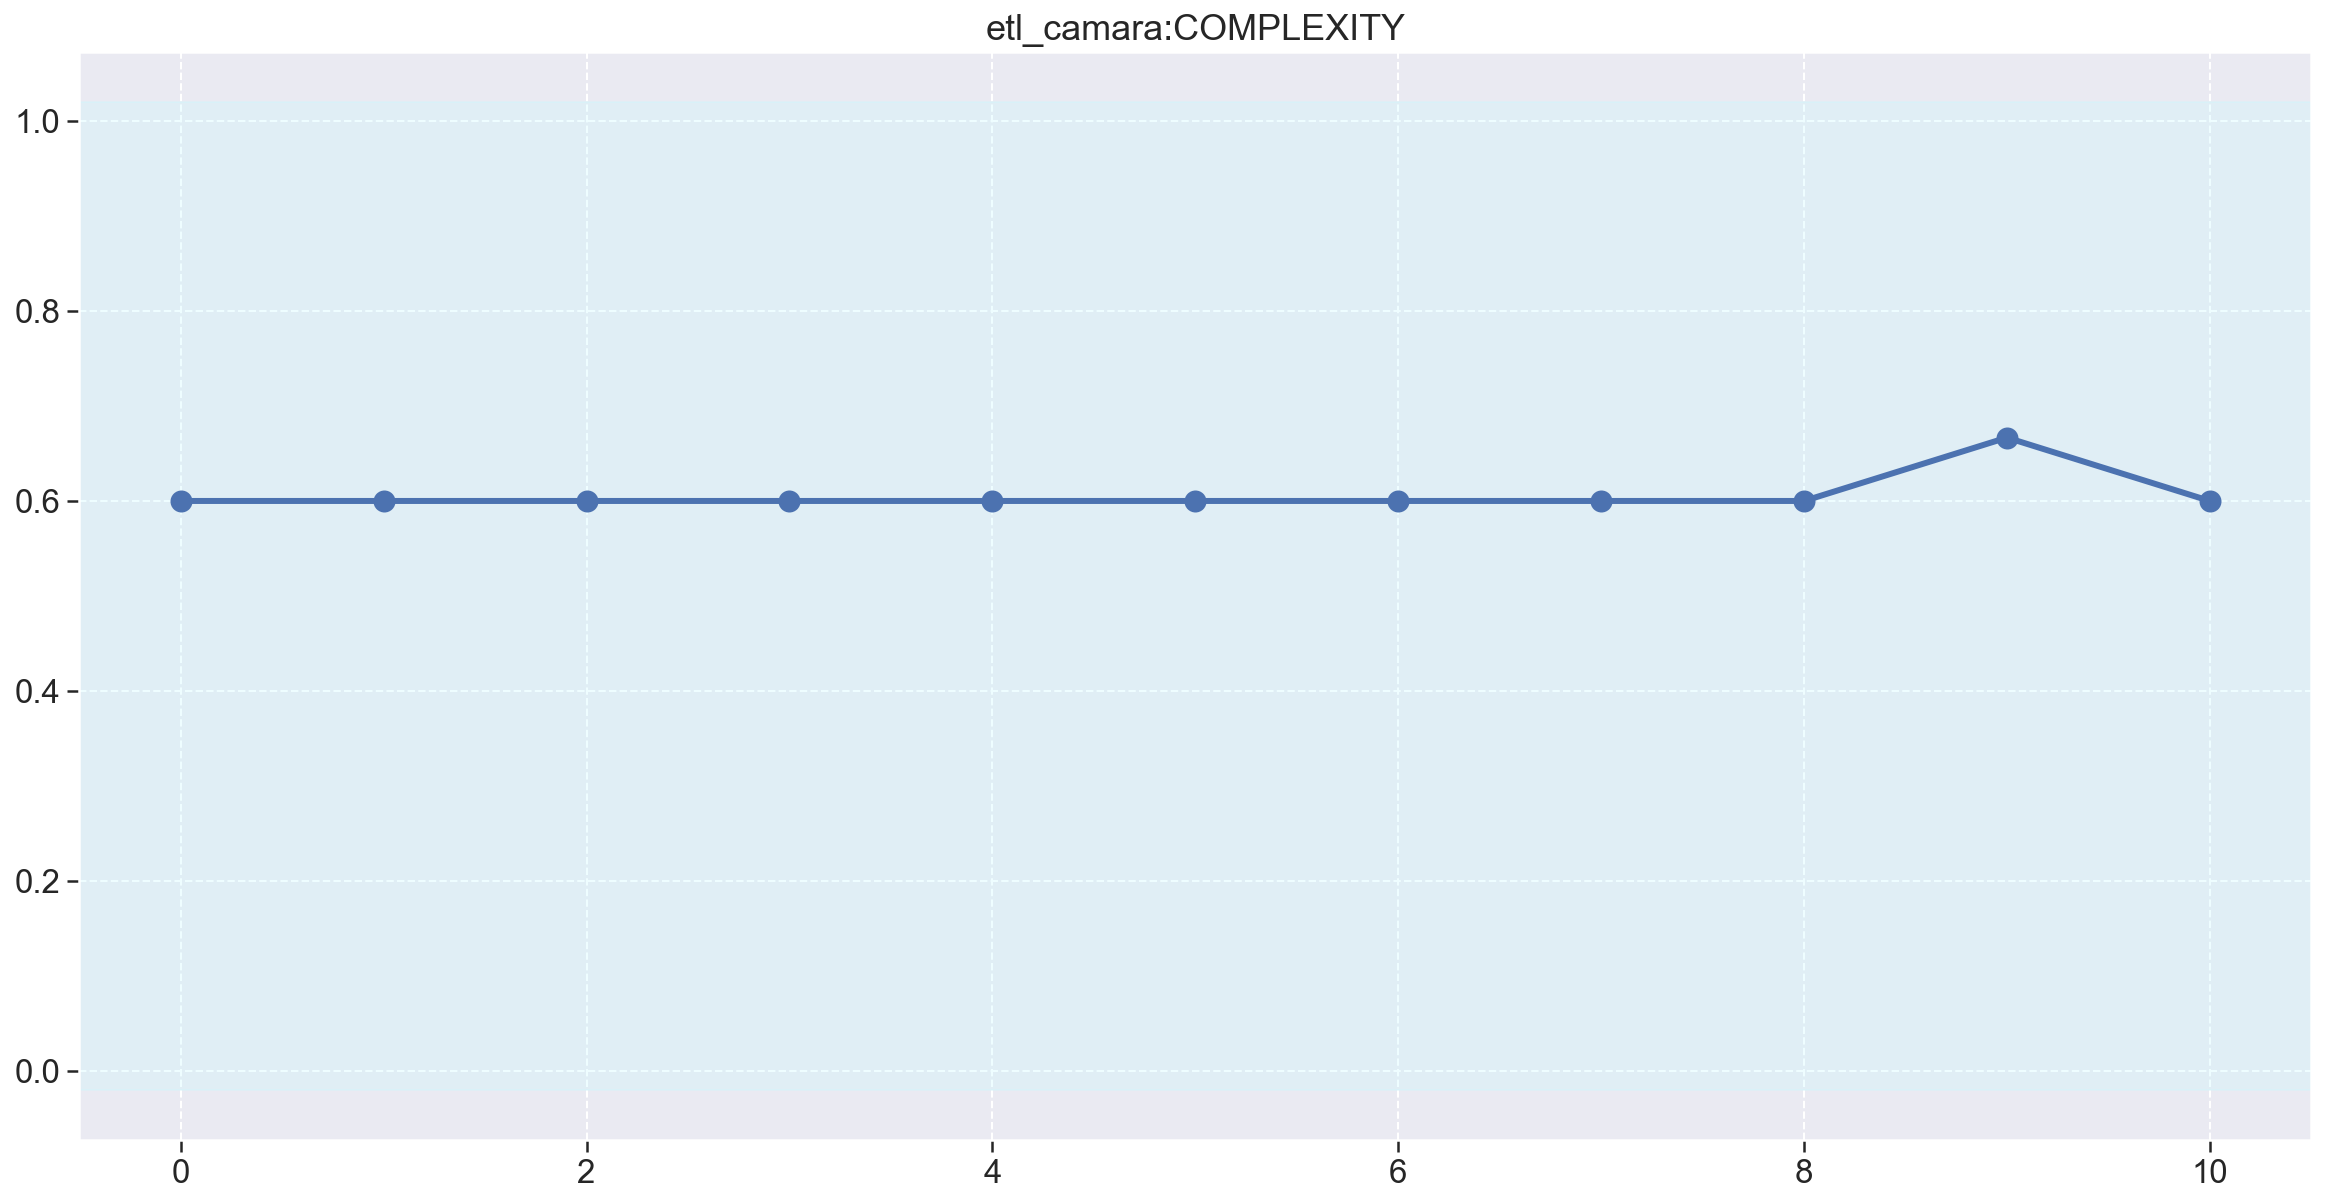

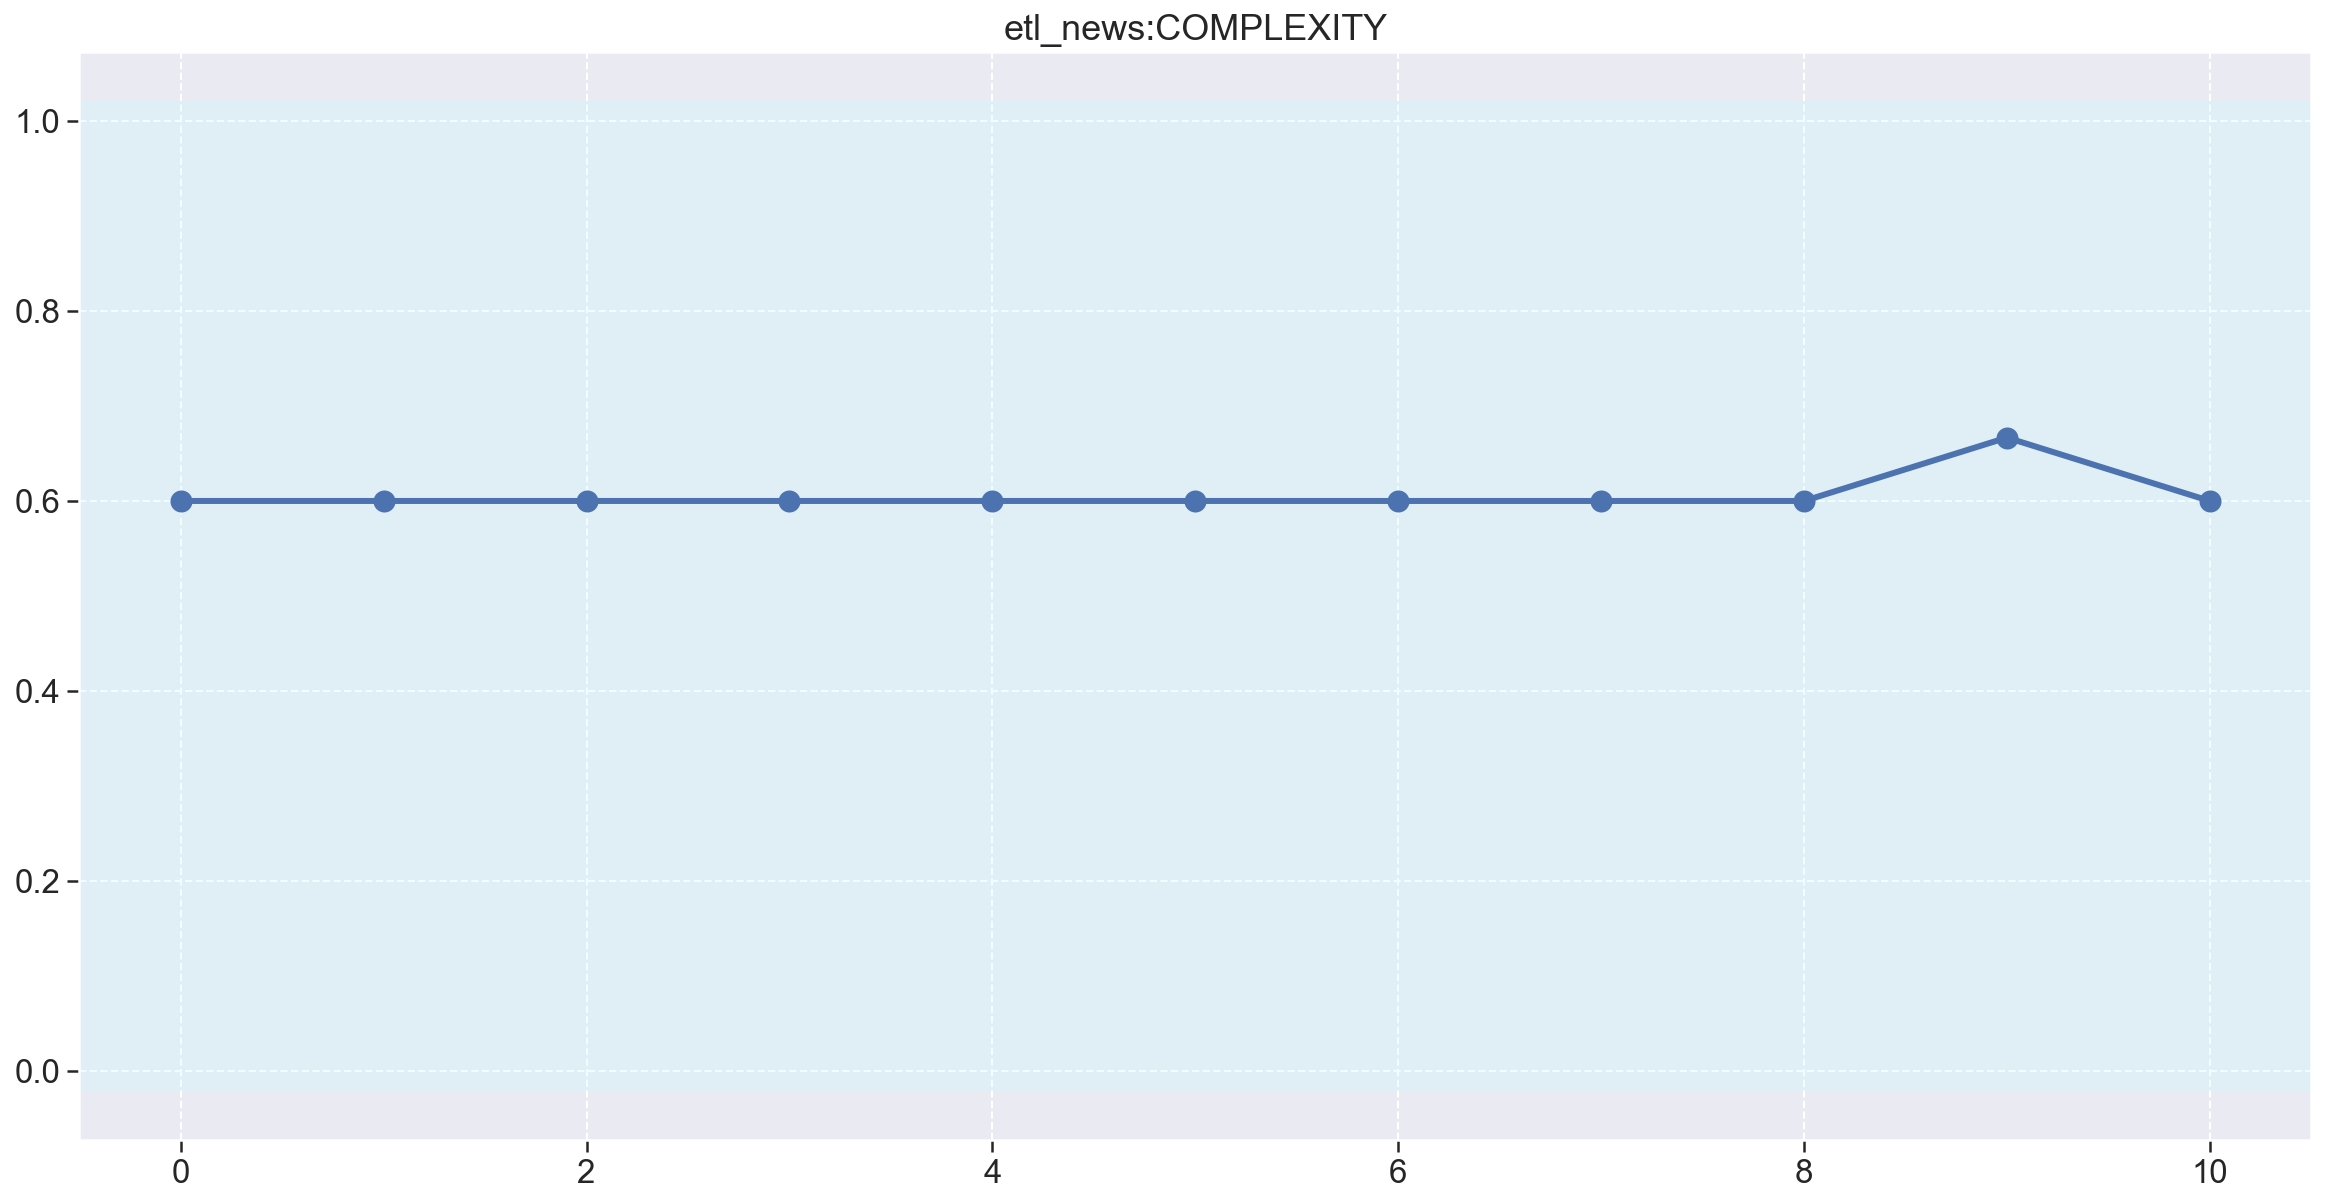

In [100]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

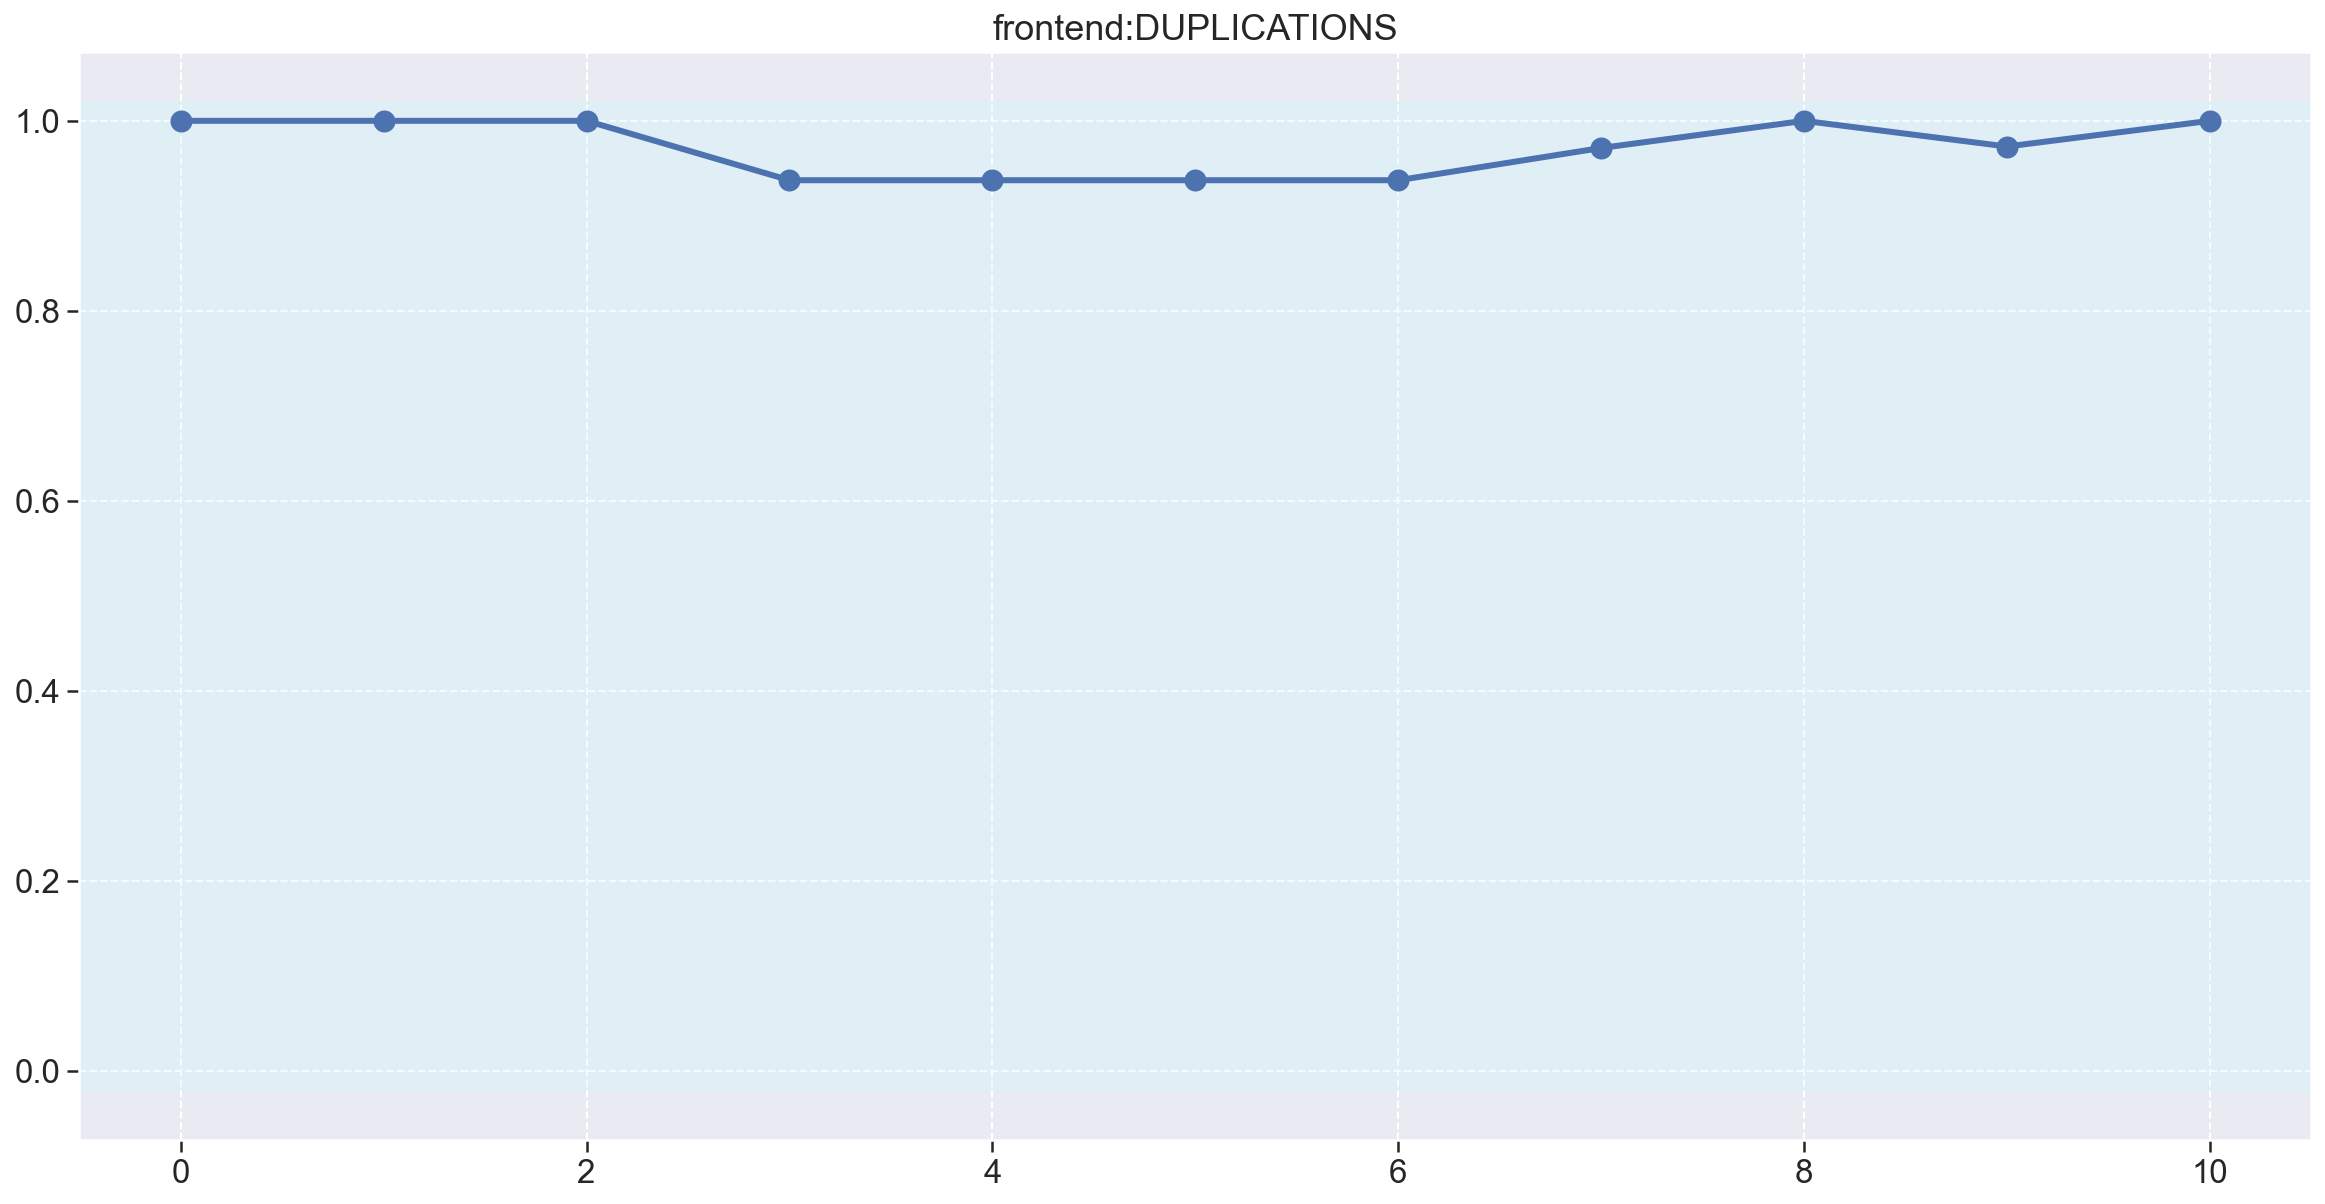

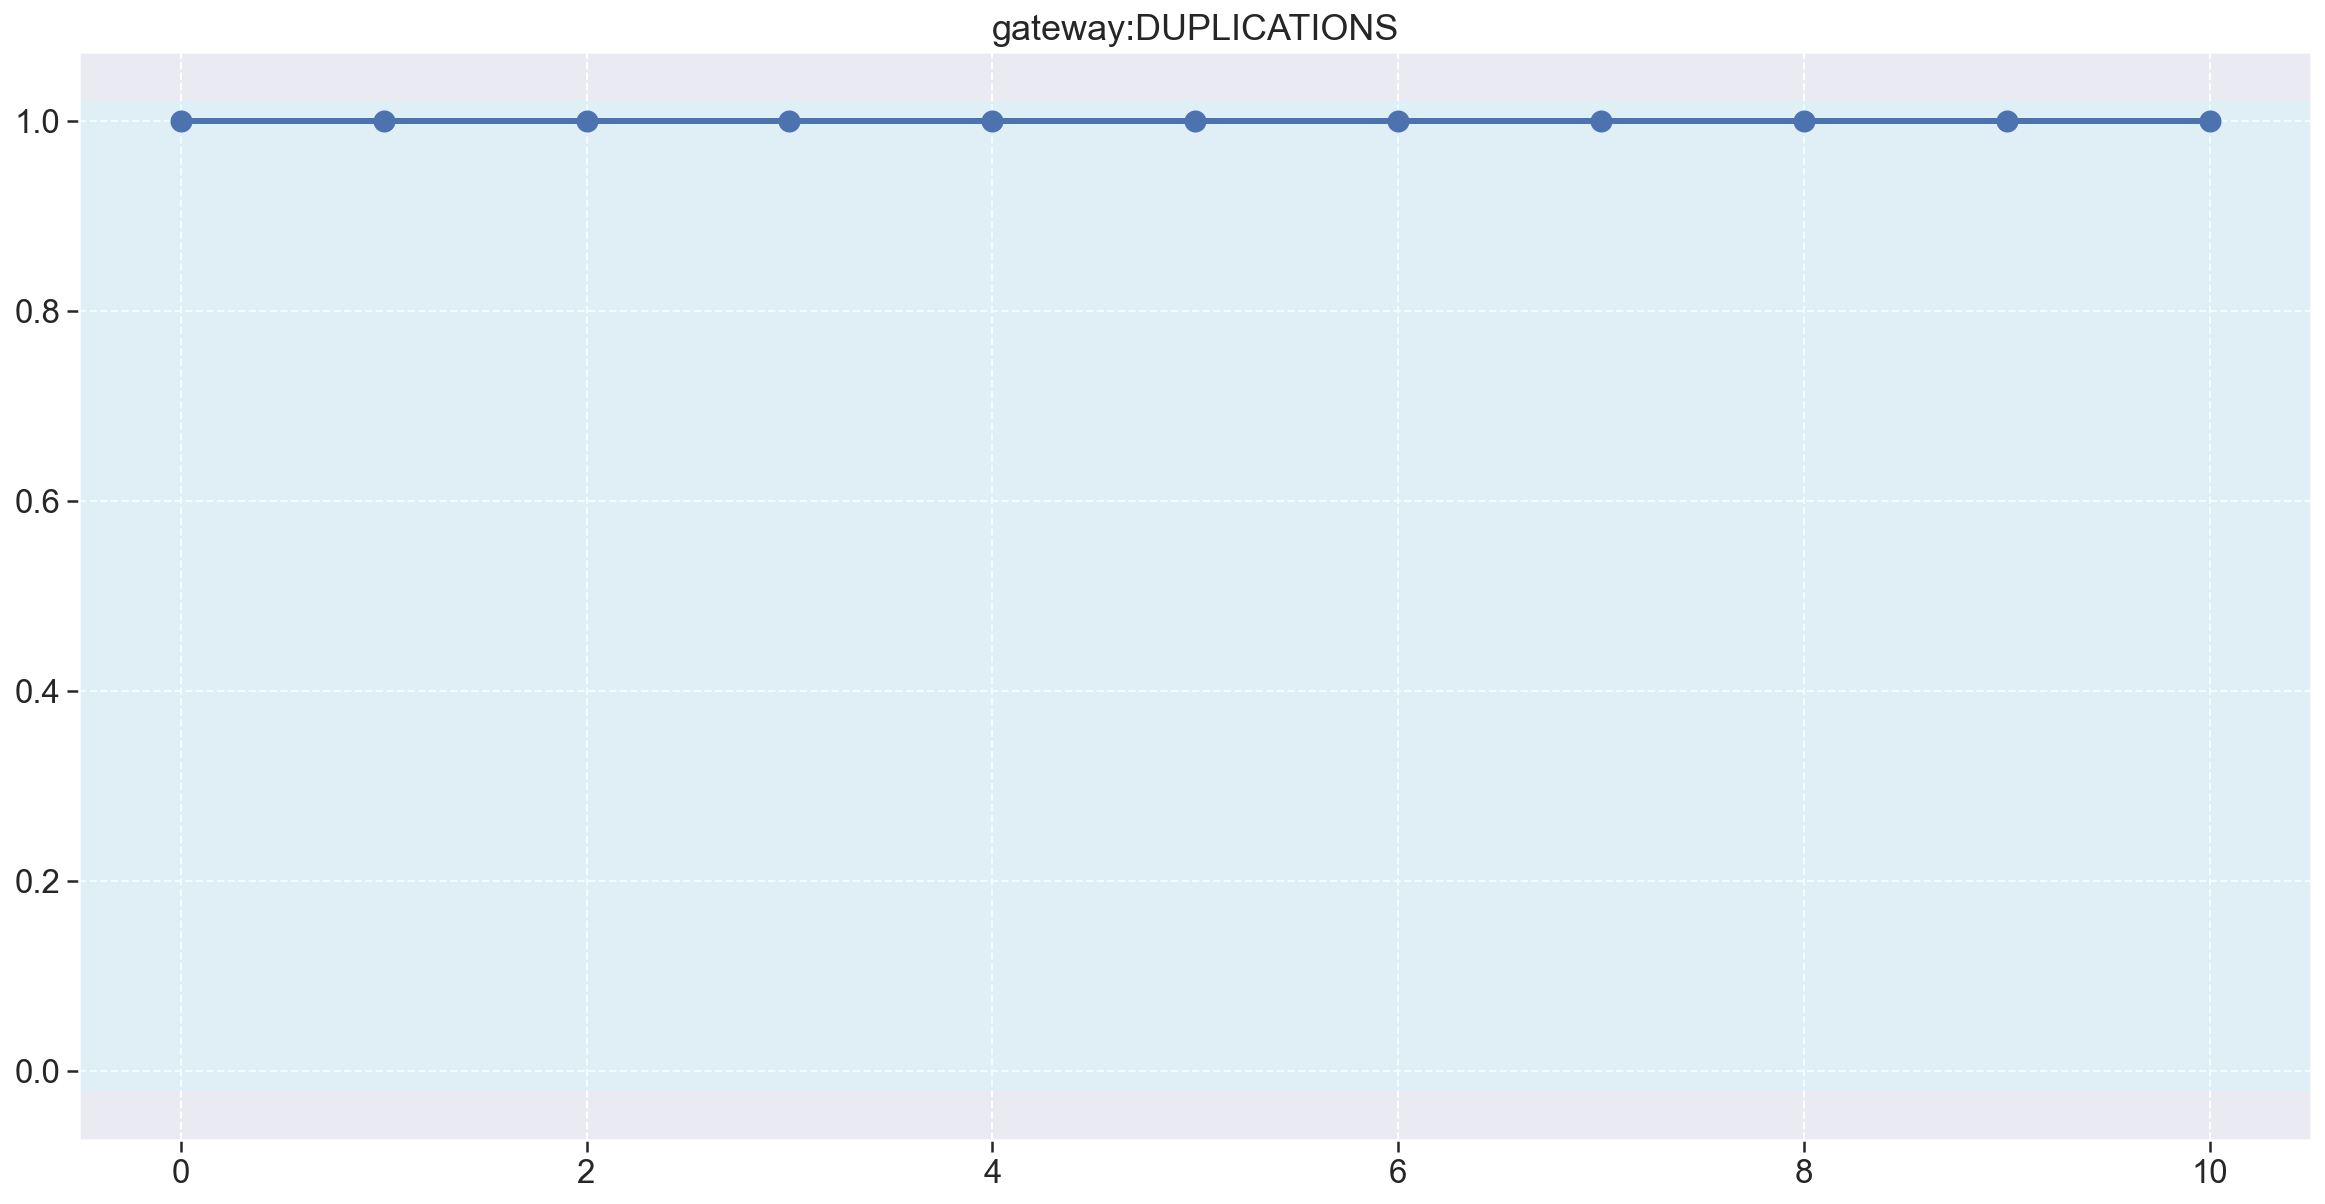

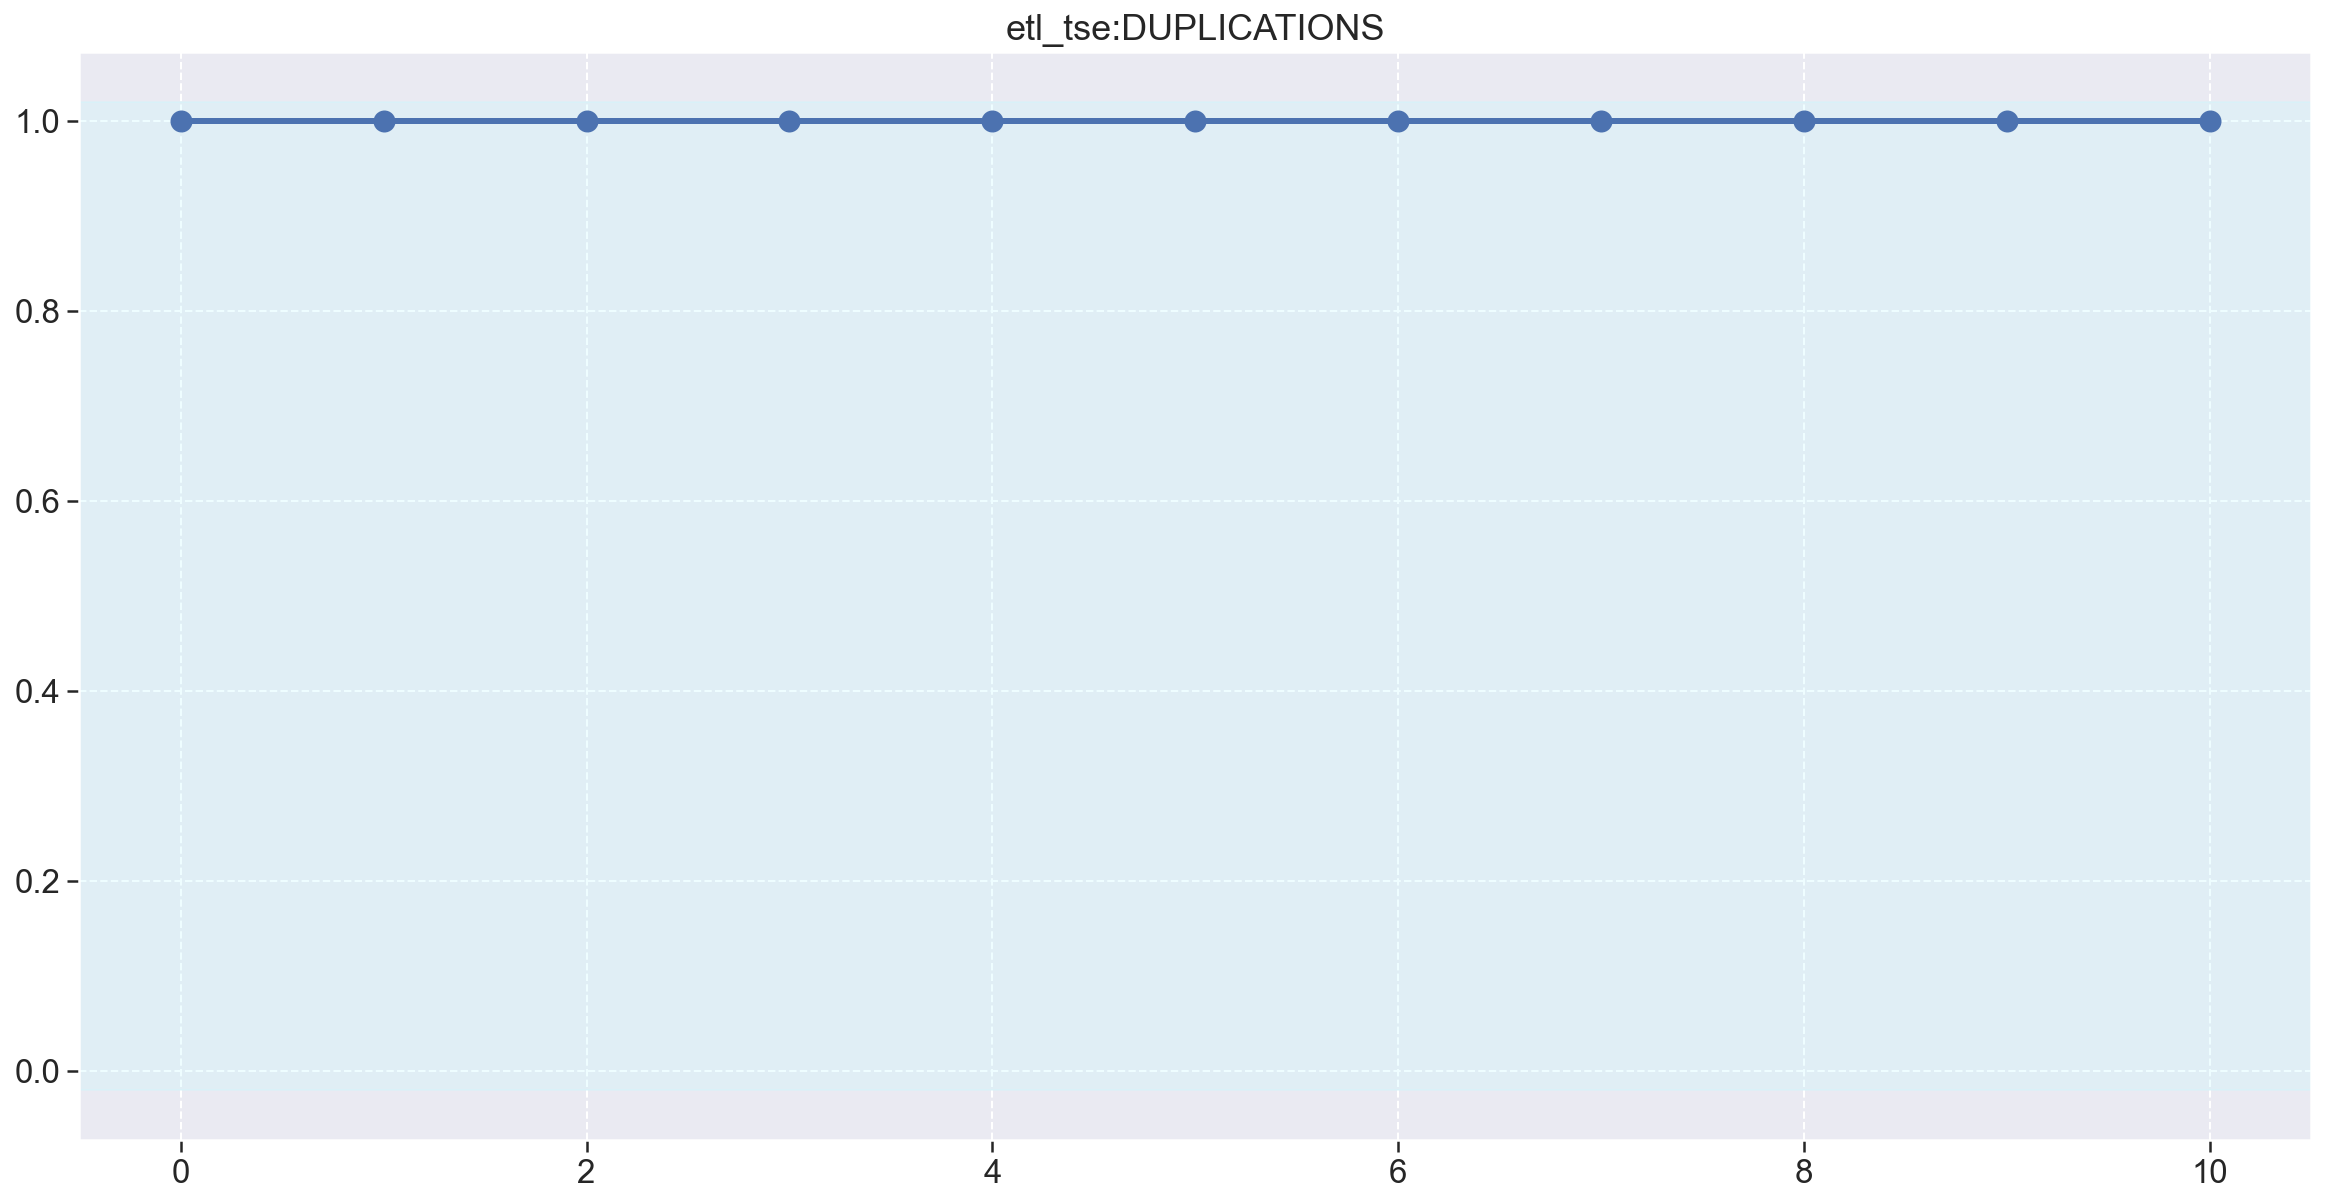

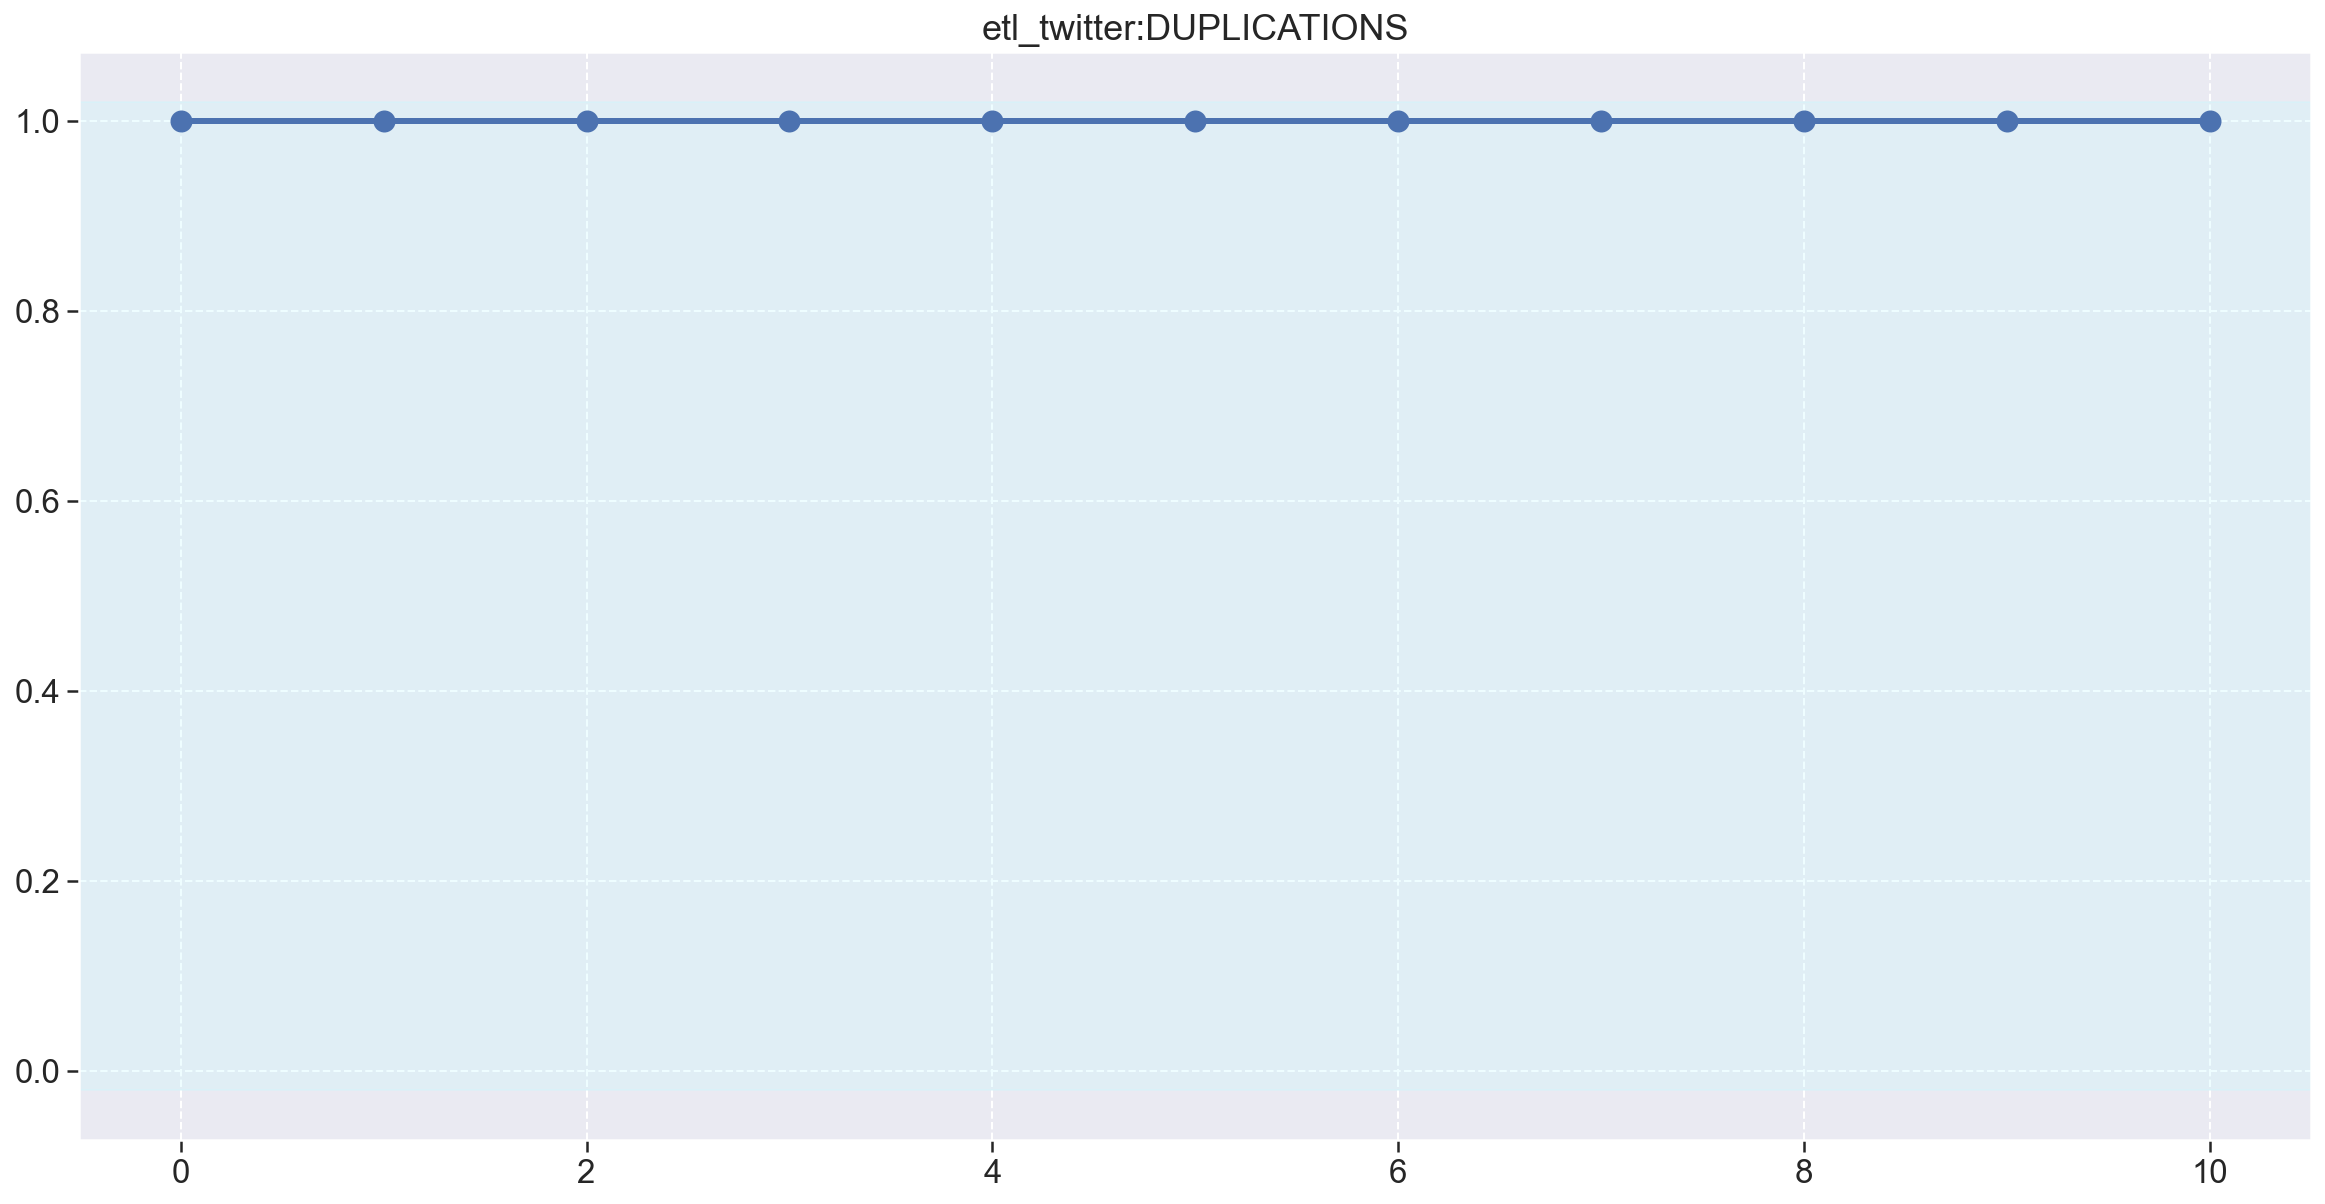

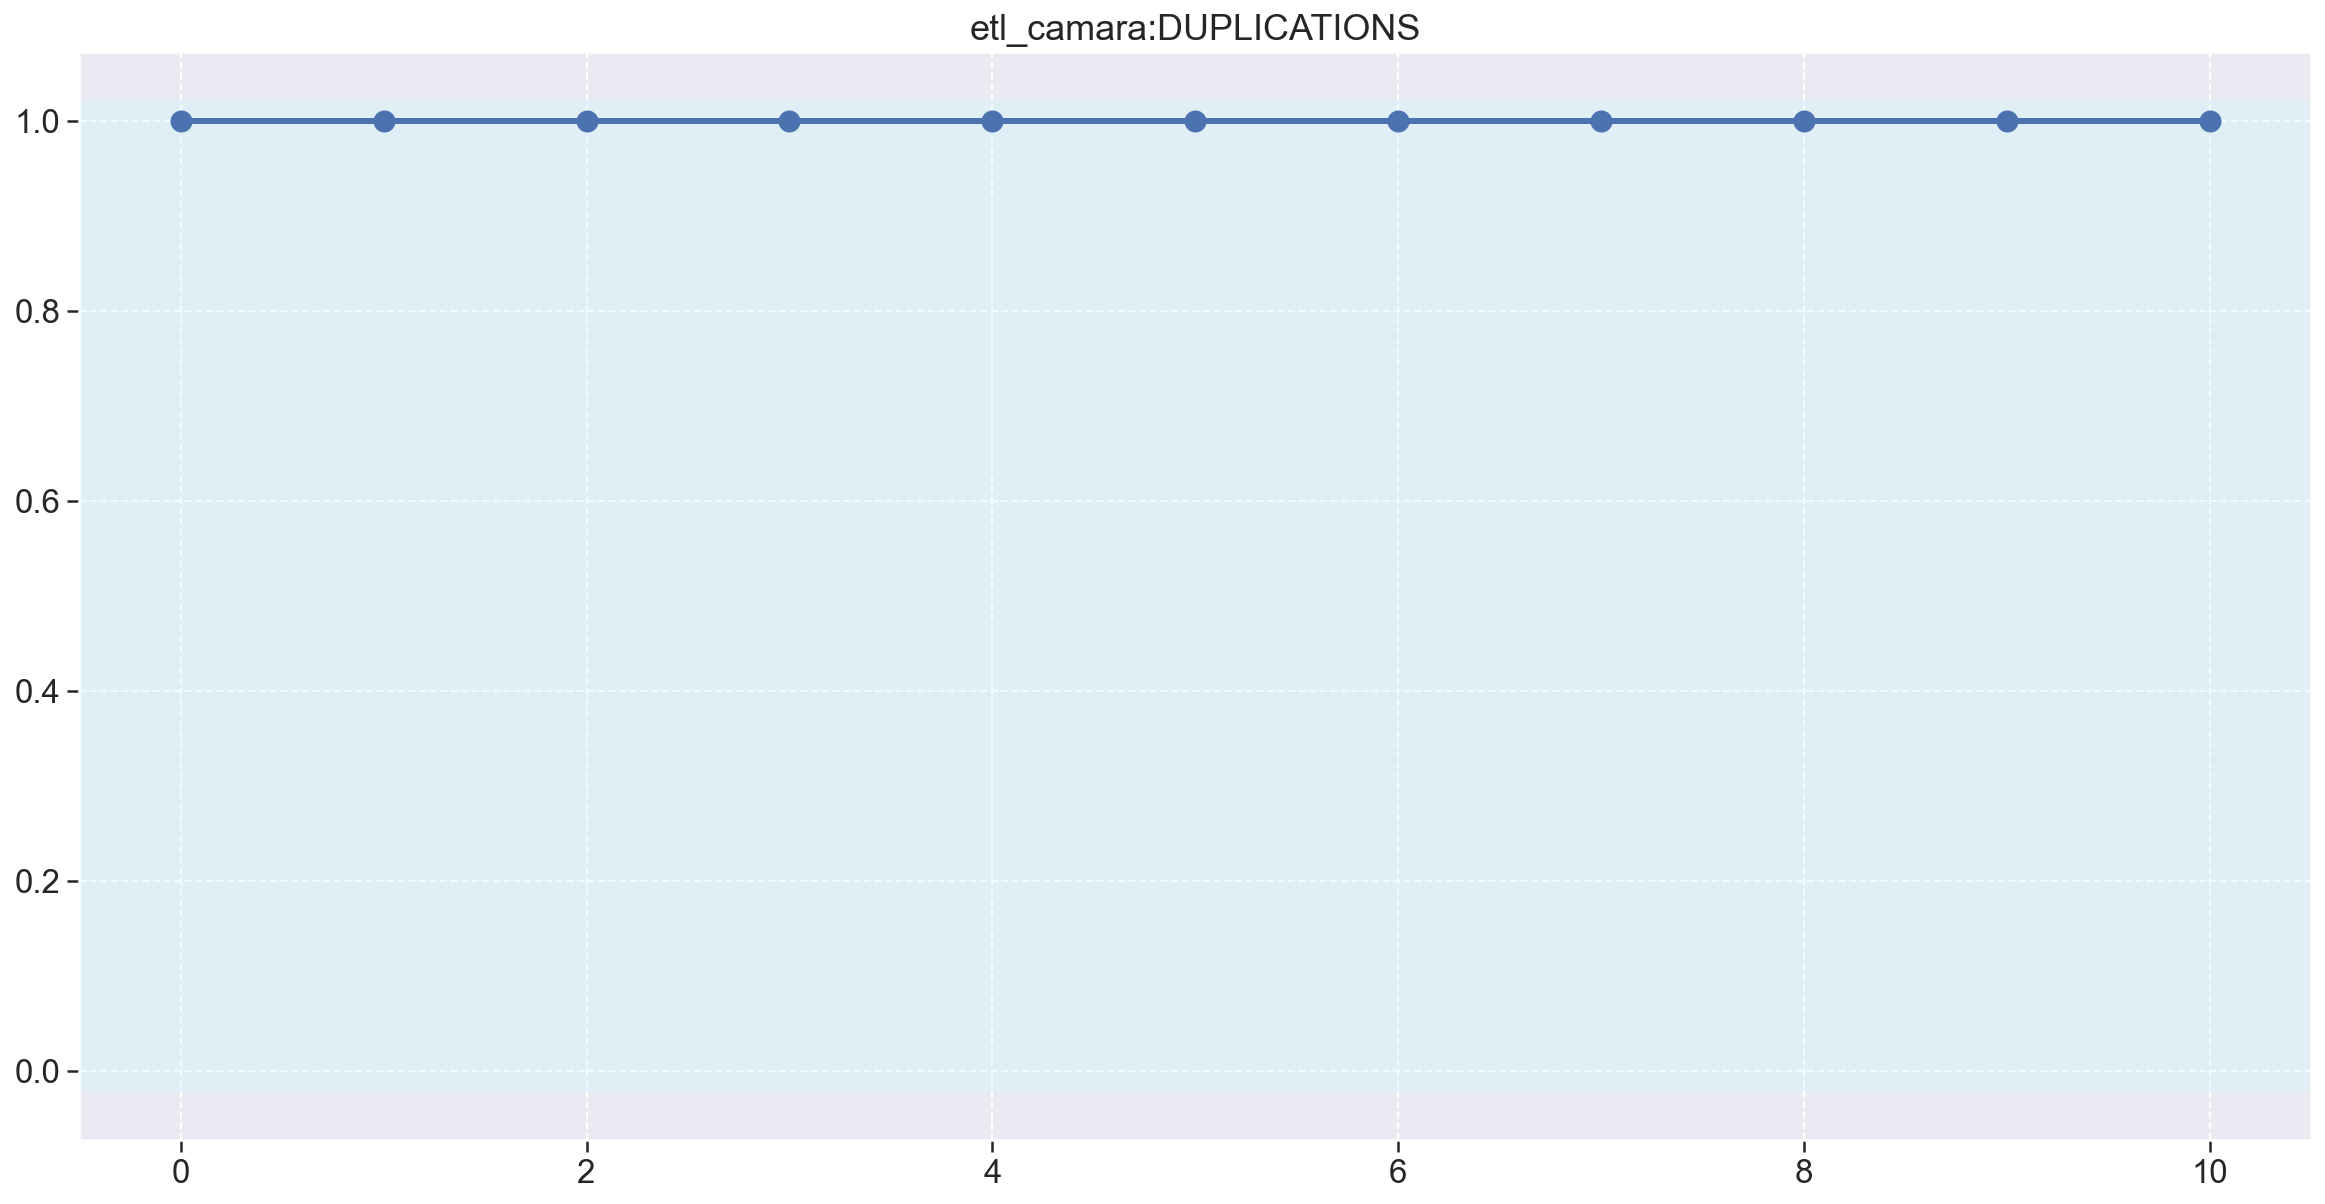

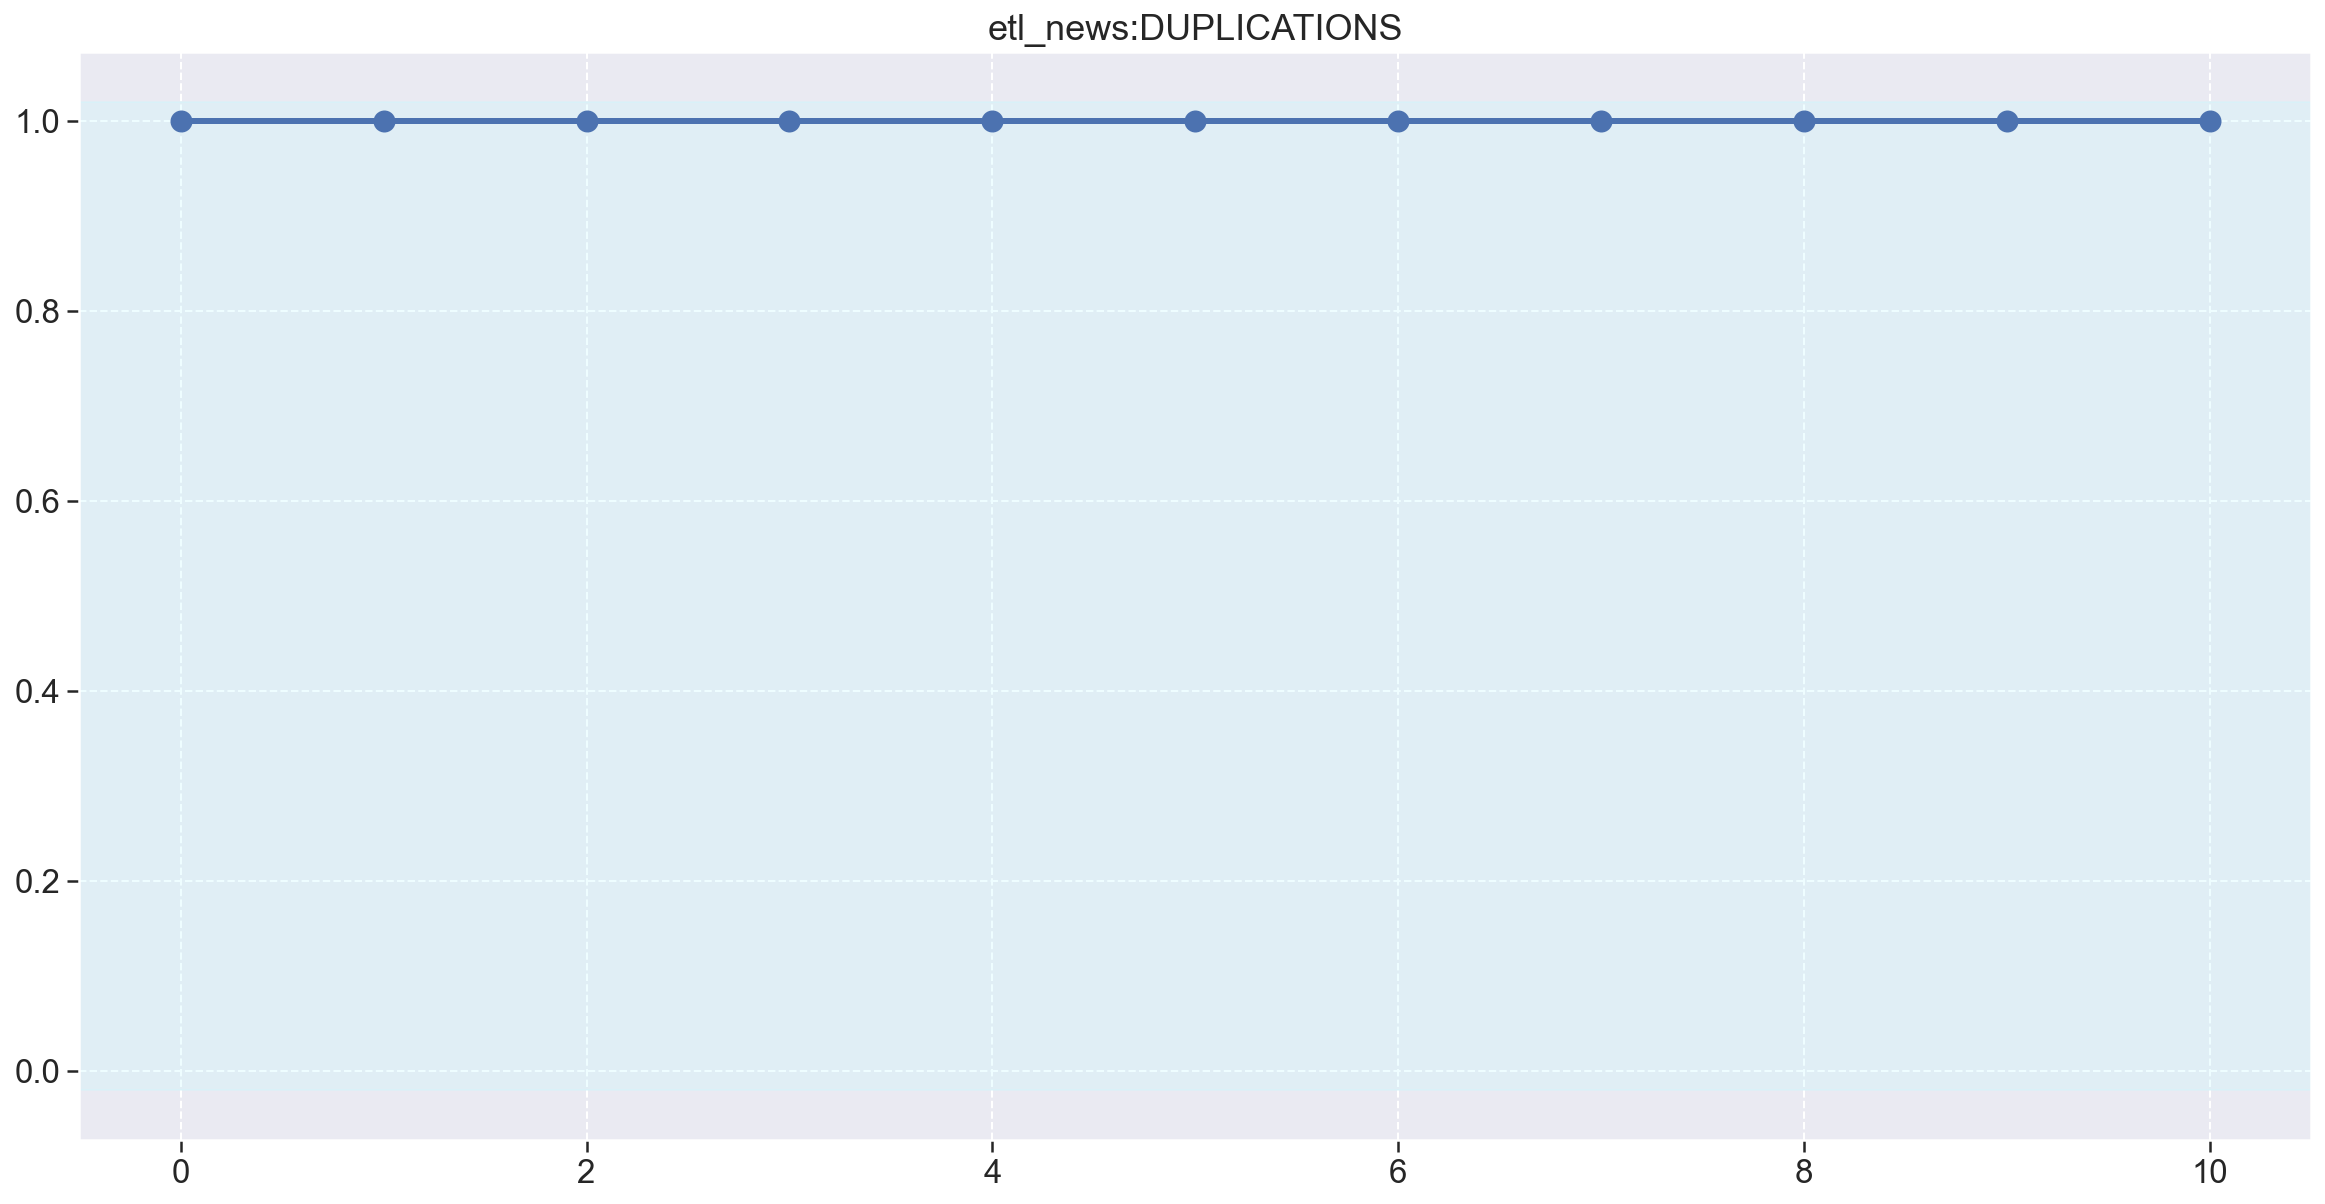

In [101]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

## Repository: Frontend

#### All metrics

(-0.02, 1.02)

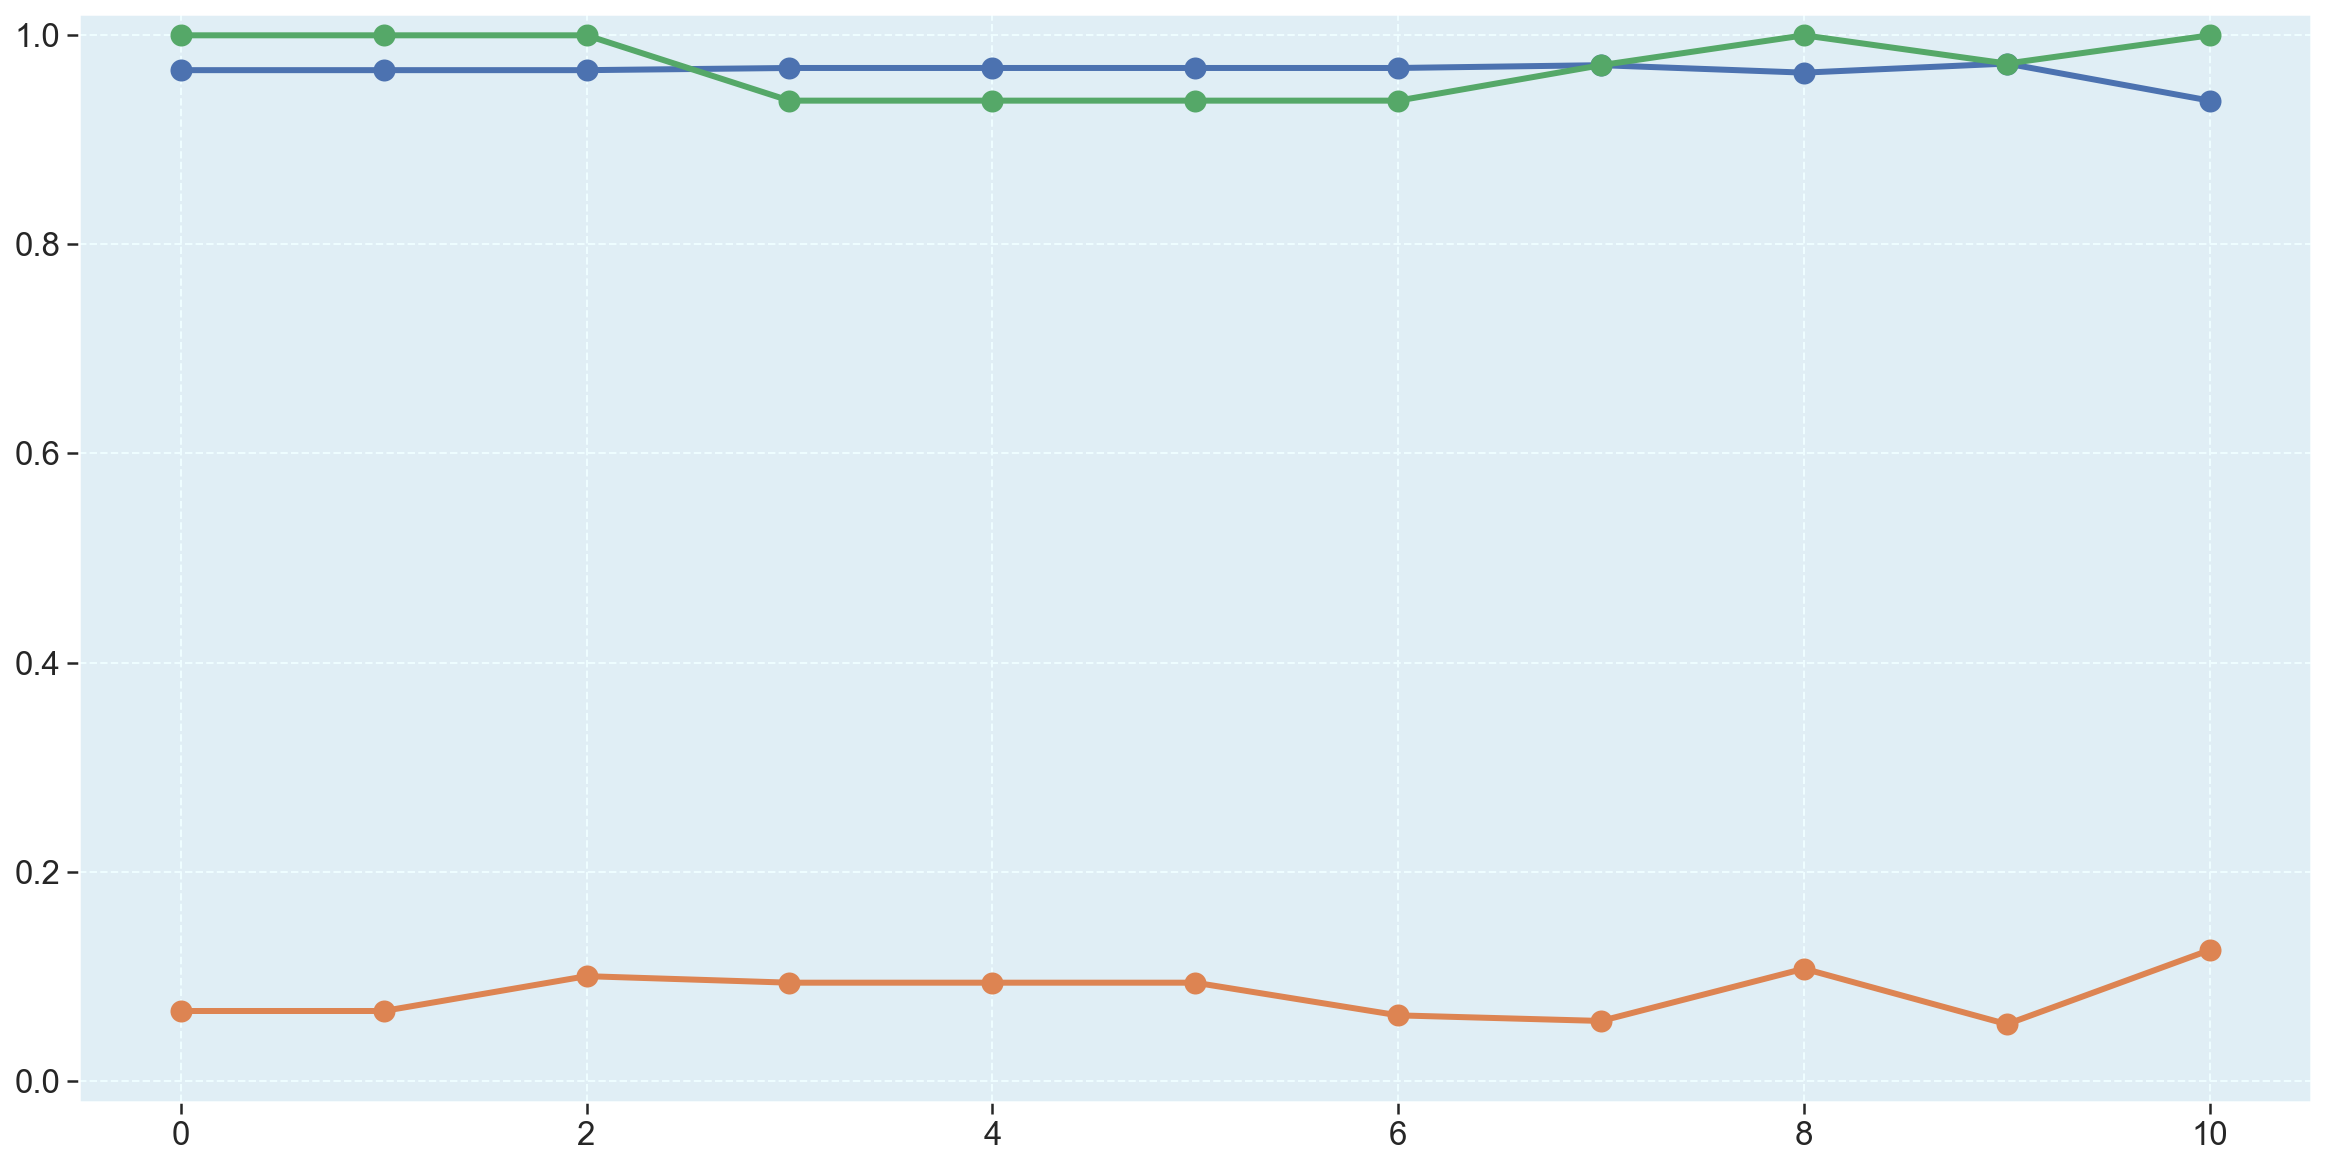

In [102]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["frontend"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["frontend"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["frontend"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

## Repository: Gateway

#### All metrics

(-0.02, 1.02)

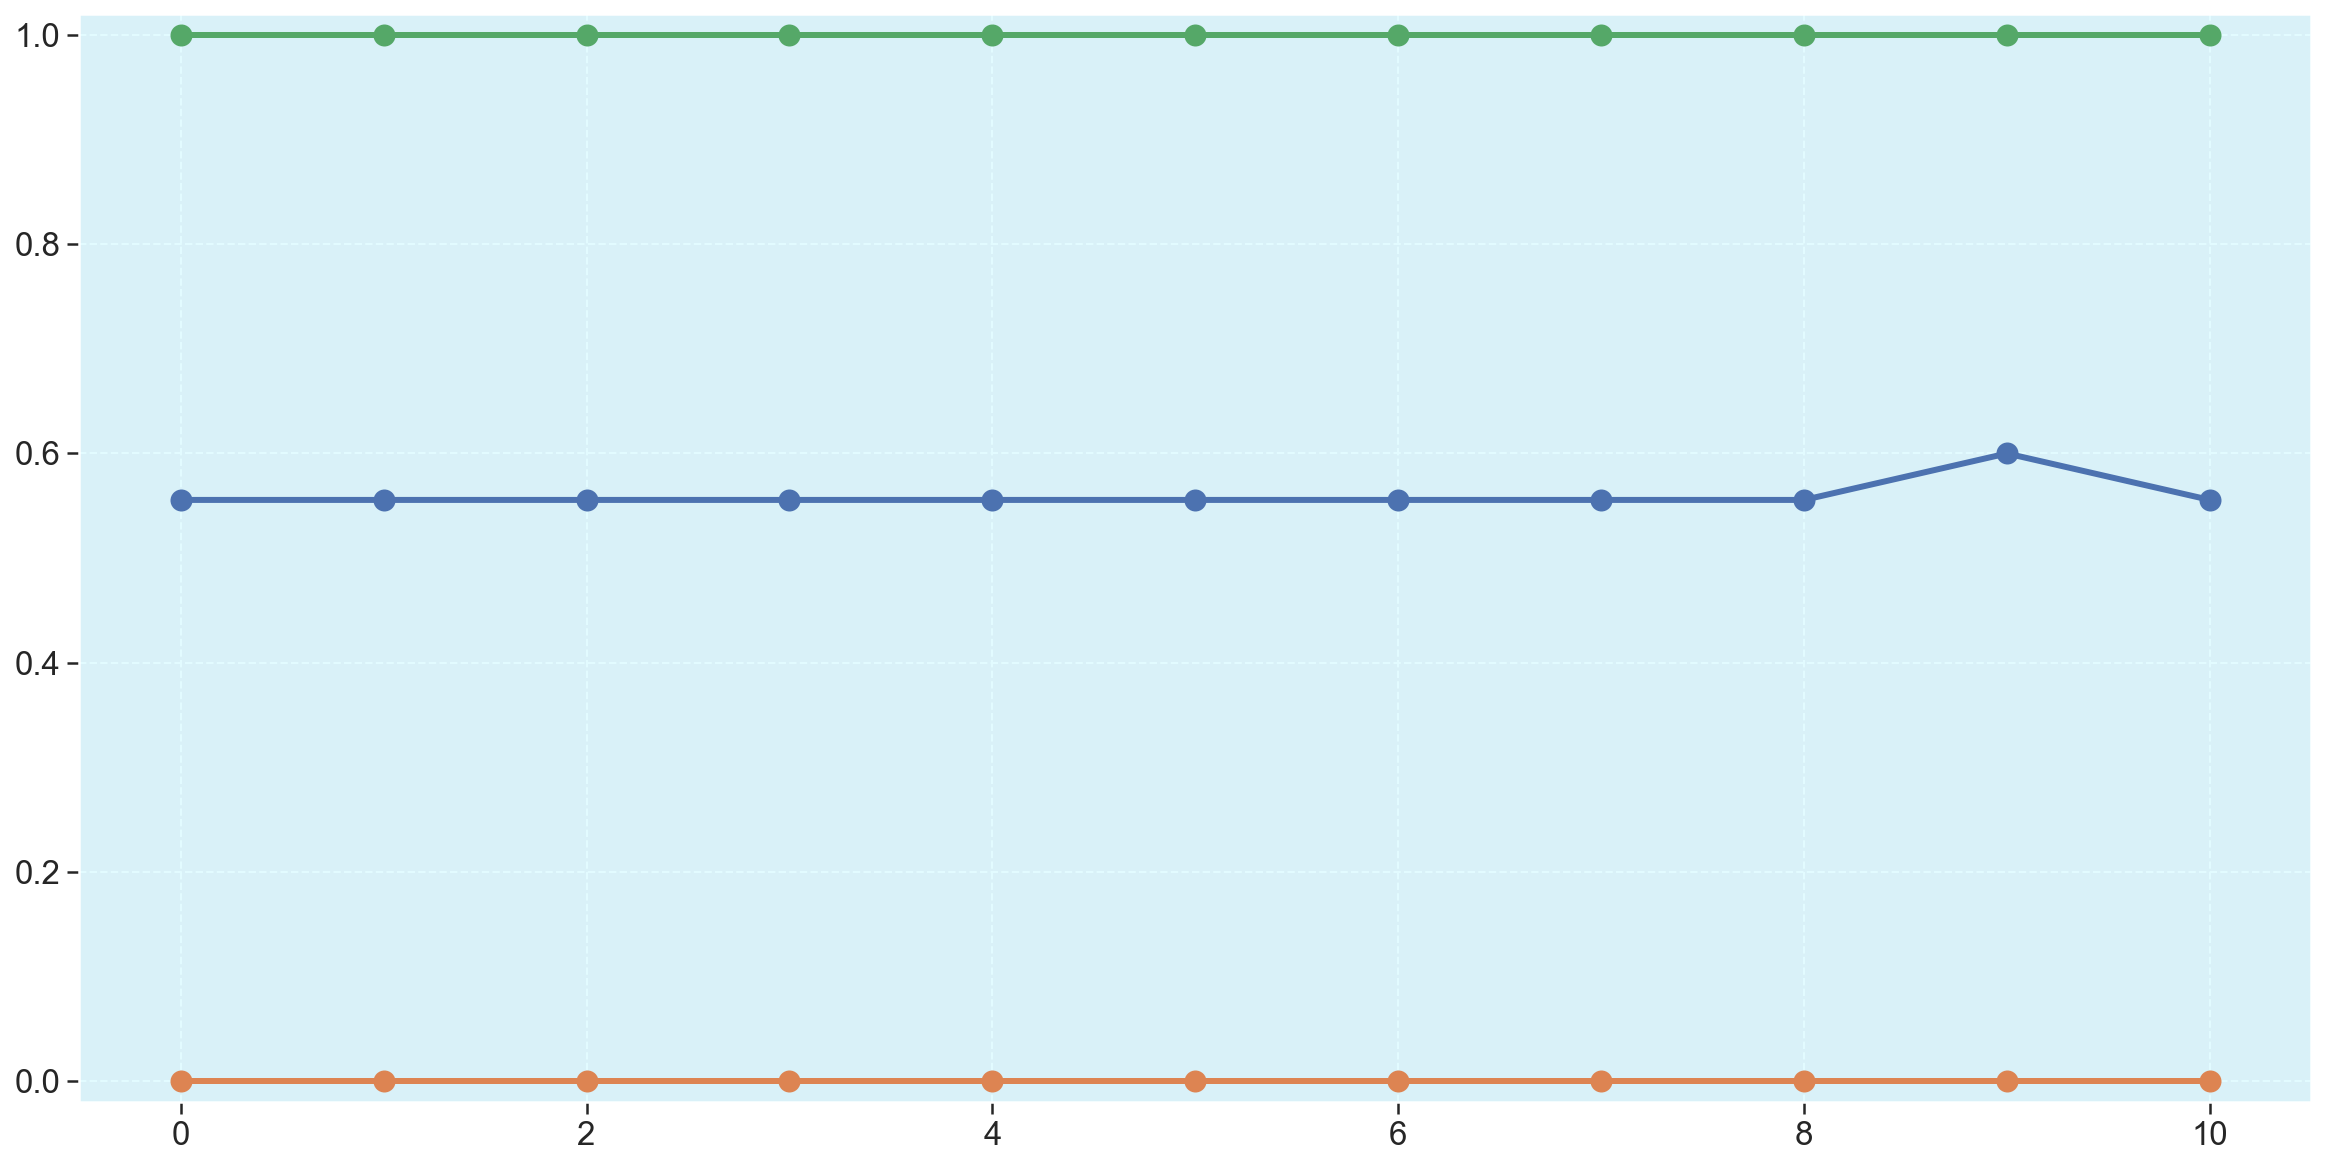

In [103]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["gateway"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["gateway"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["gateway"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: etl_tse

#### All metrics

(-0.02, 1.02)

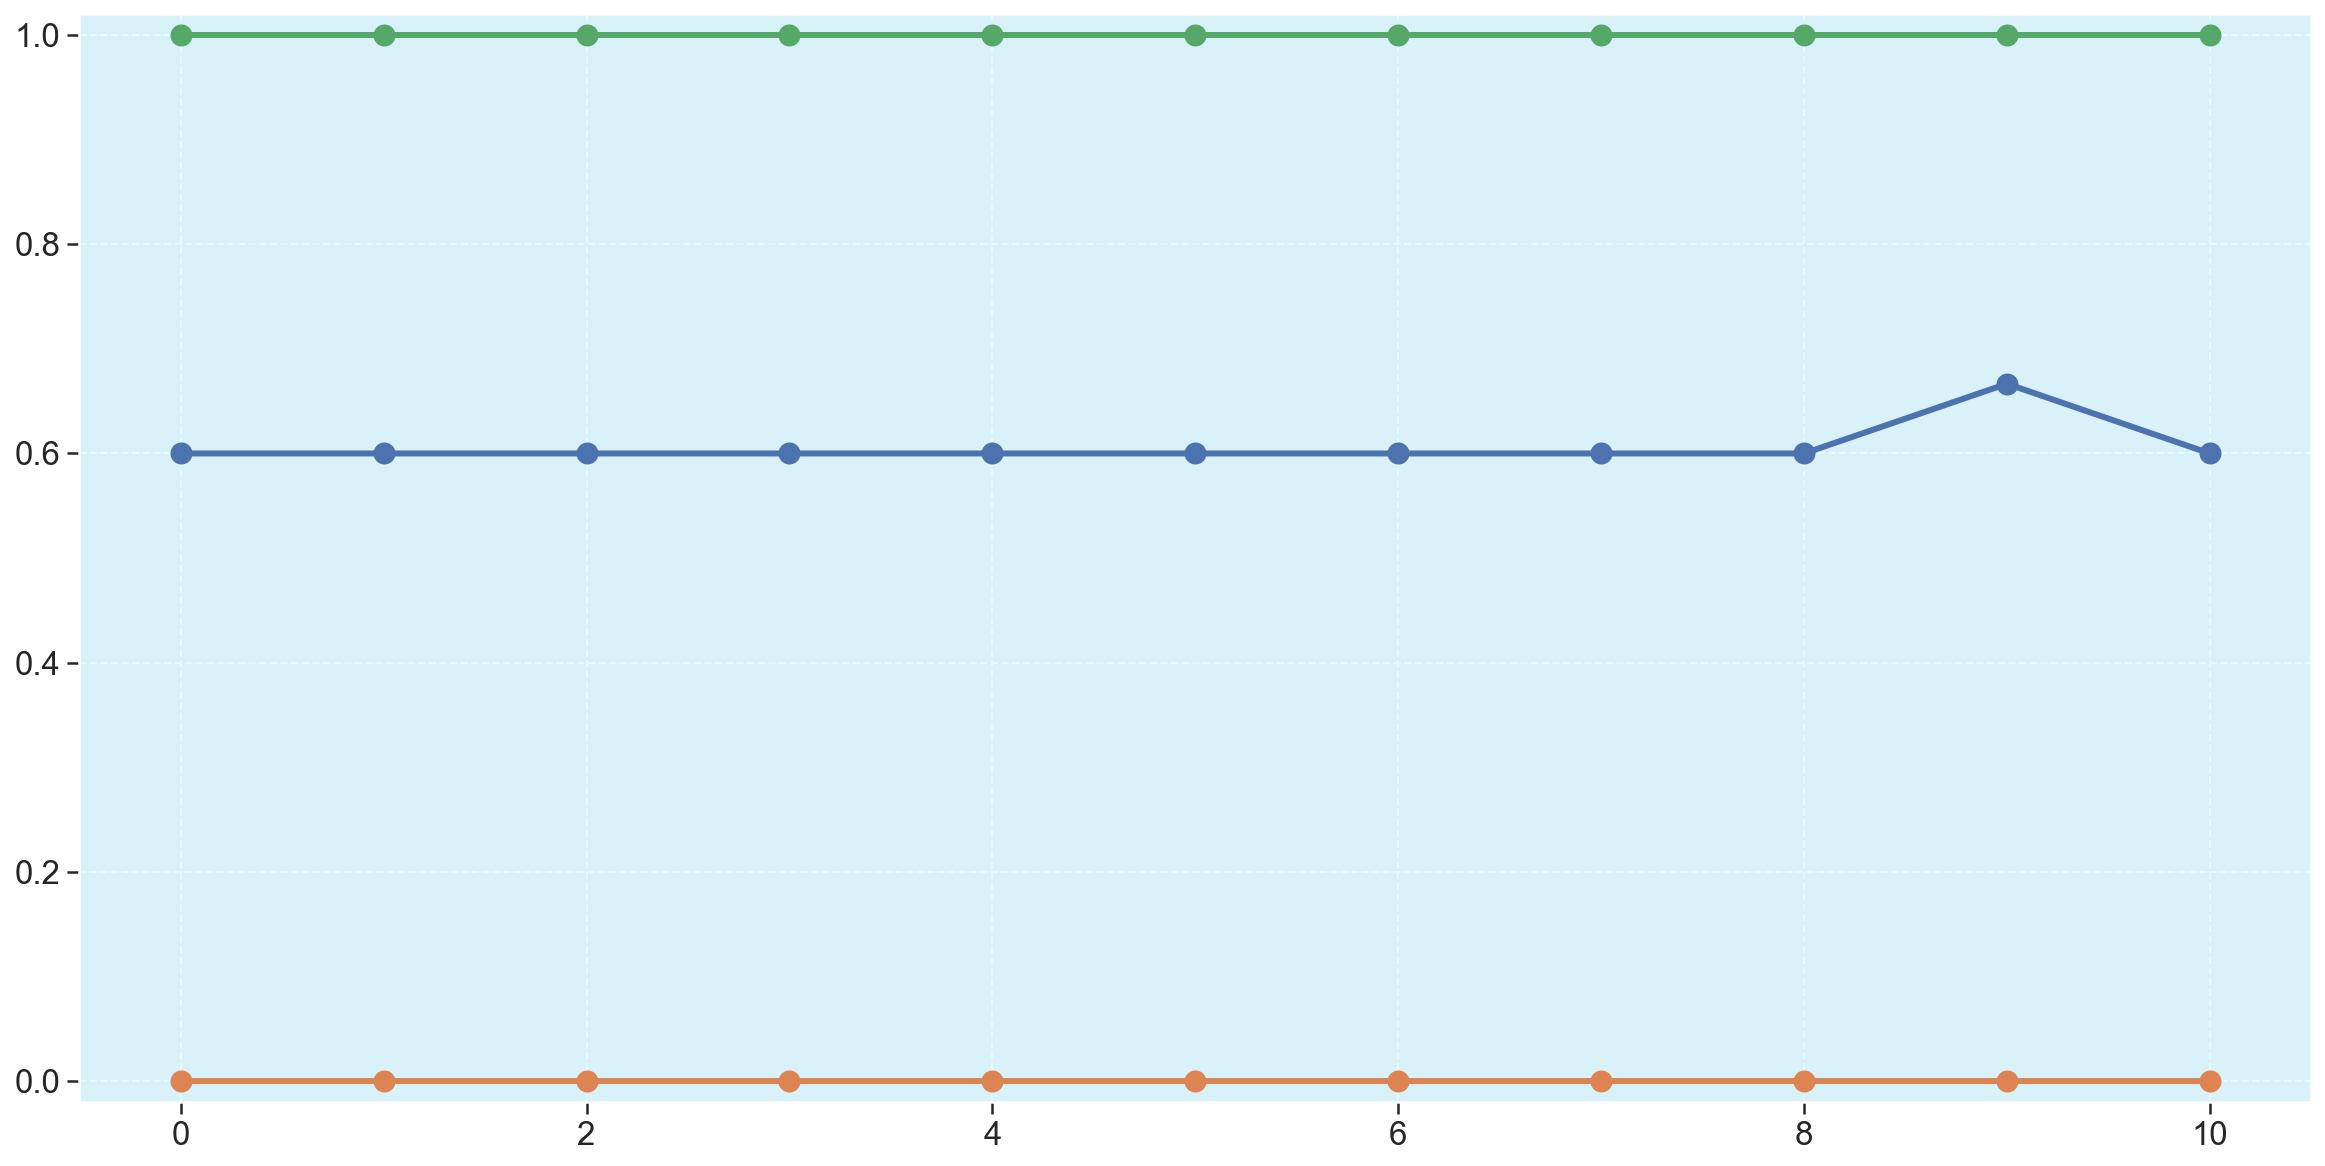

In [104]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["etl_tse"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_tse"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_tse"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: etl_twitter

(-0.02, 1.02)

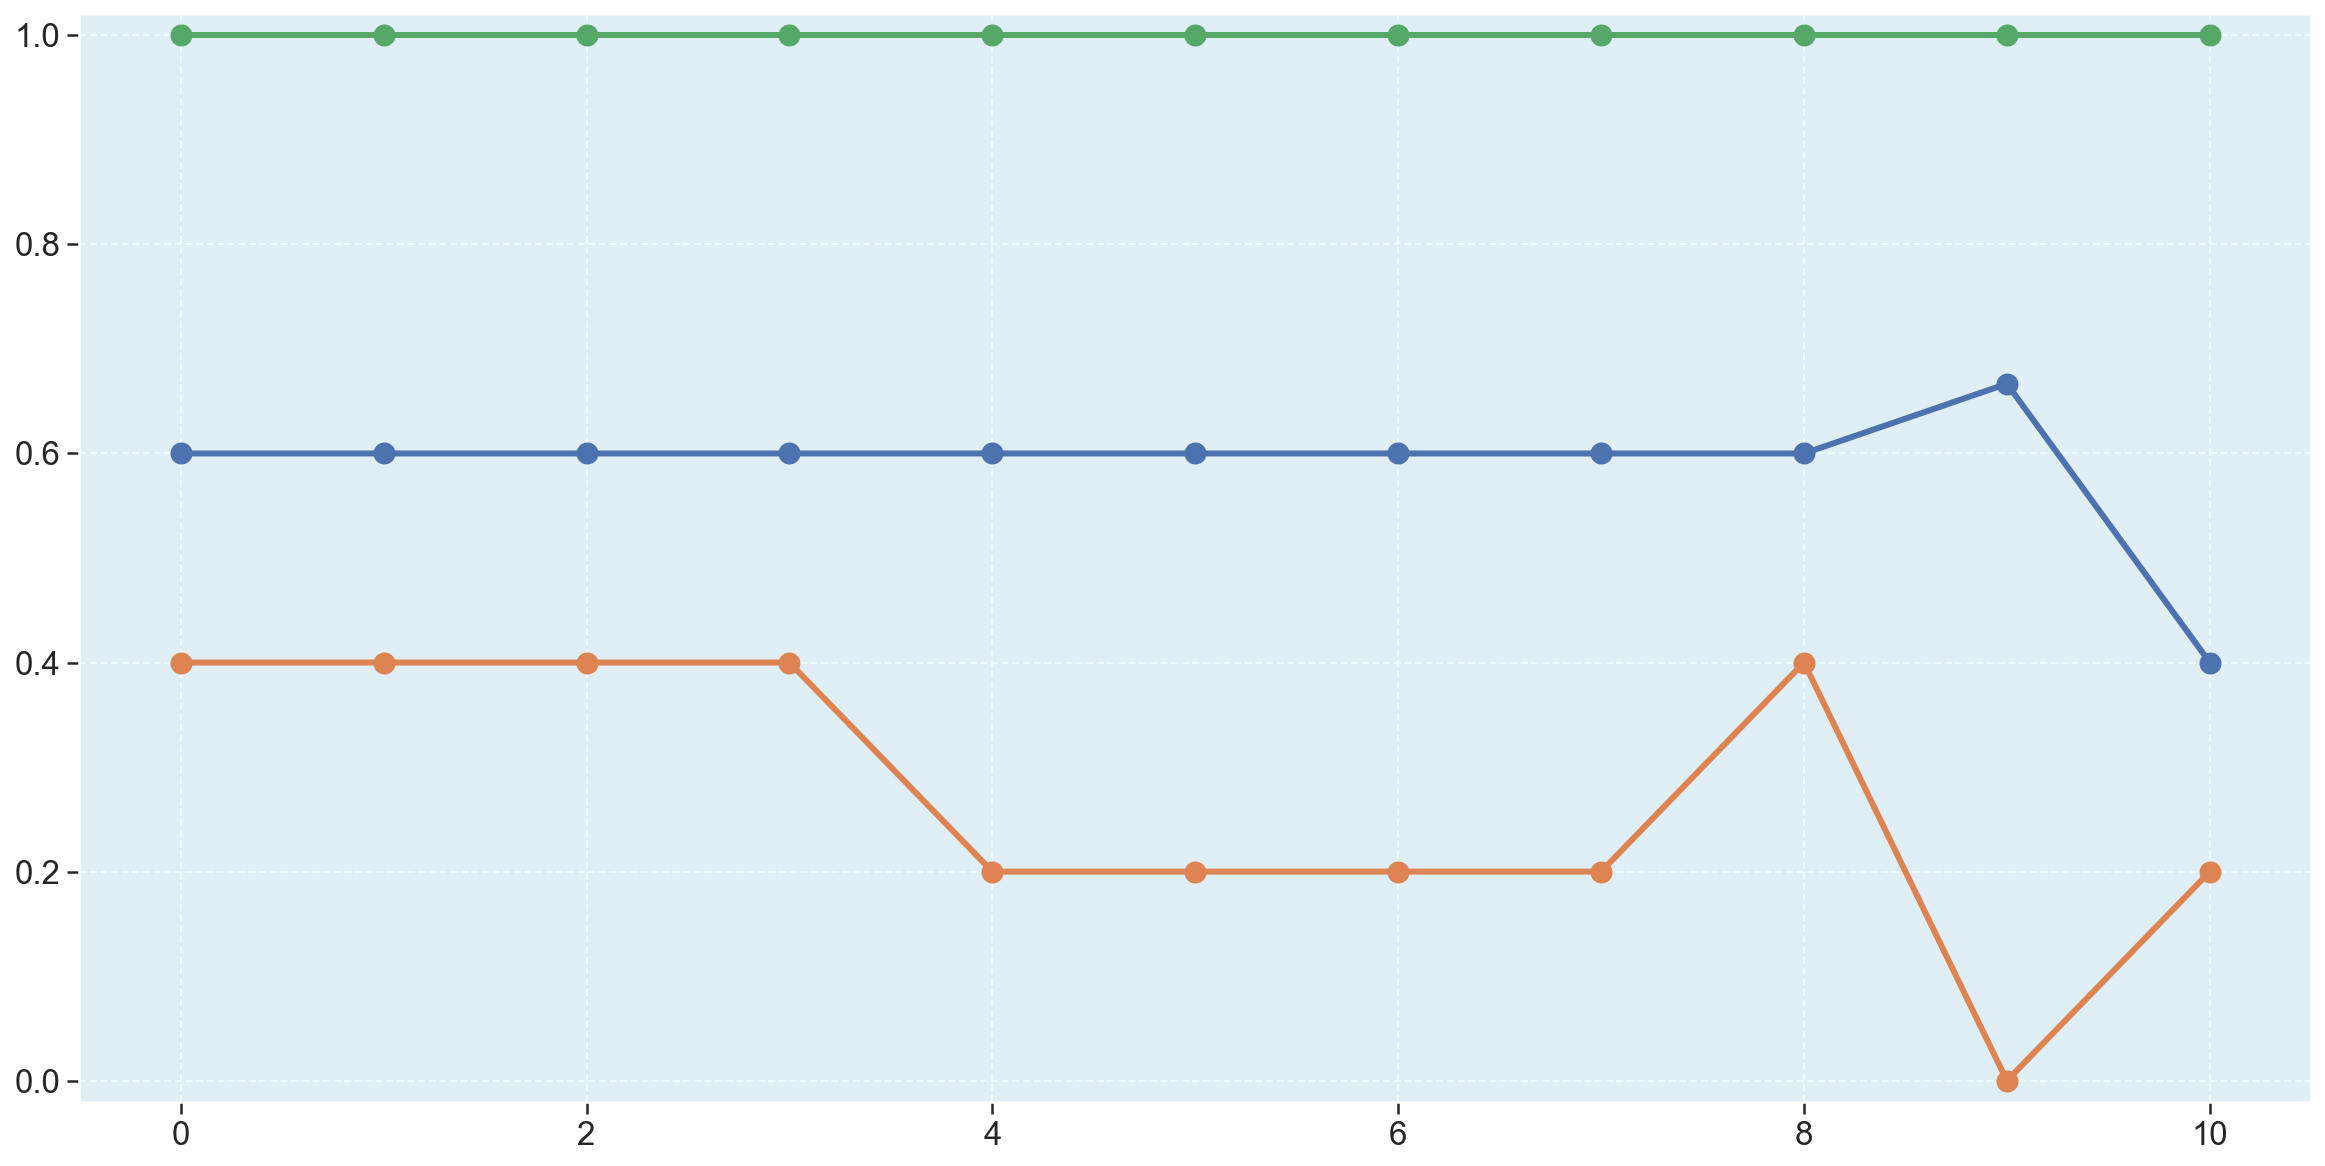

In [105]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["etl_twitter"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_twitter"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_twitter"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

## Repository: etl_news

(-0.02, 1.02)

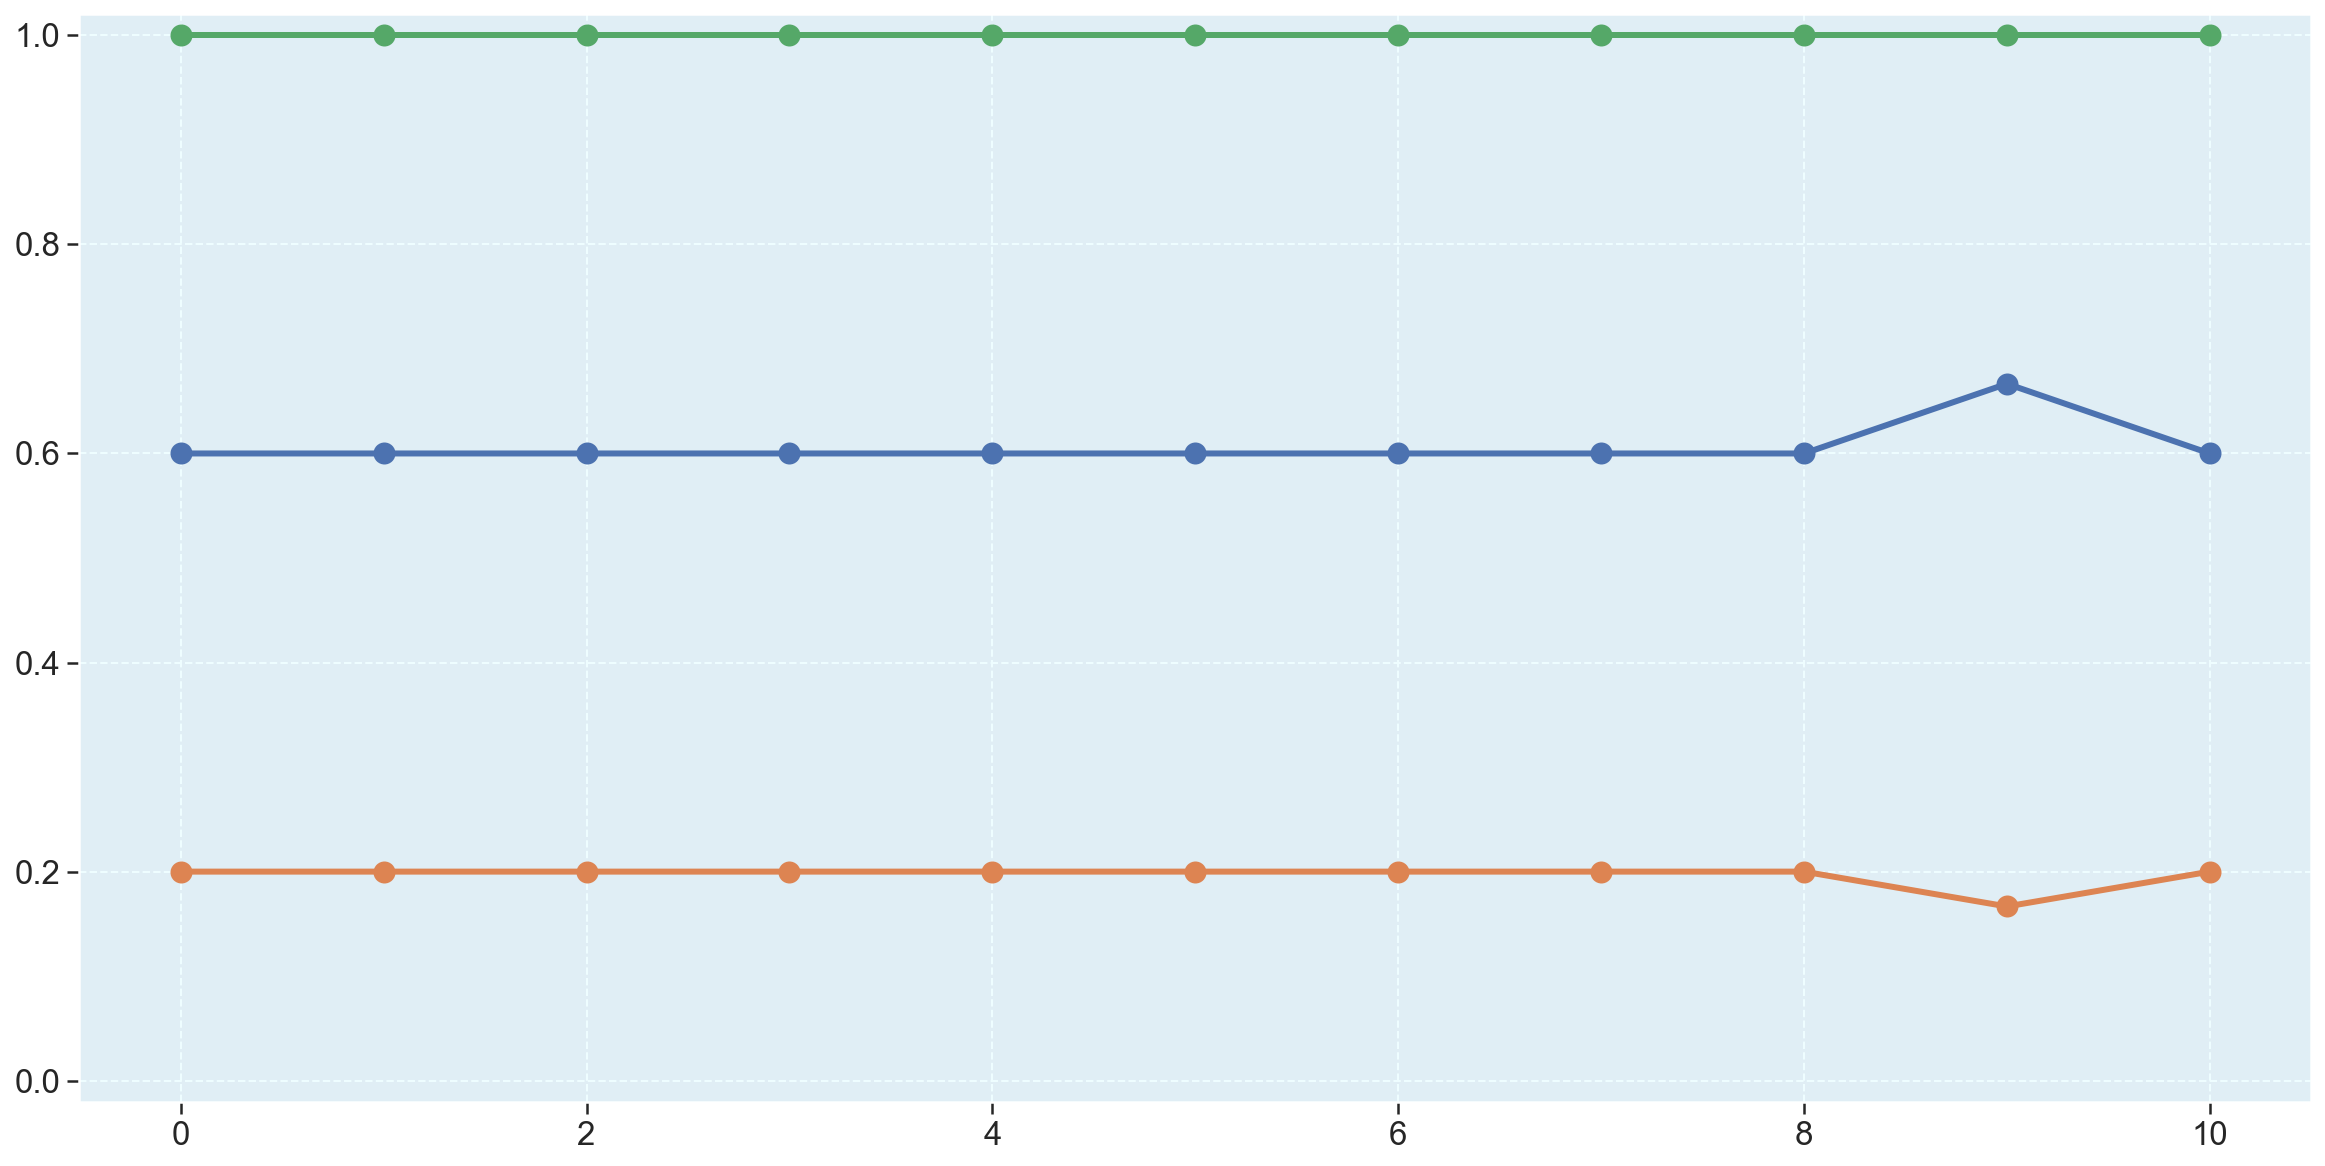

In [106]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["etl_news"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_news"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["etl_news"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

### Ponderação e Agregação na SubCaracterística

In [107]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repository_metrics["frontend"]['asc1'] = ((repository_metrics["frontend"]['m1']*pm1)+
                                                                   (repository_metrics["frontend"]['m2']*pm2)+
                                                                   (repository_metrics["frontend"]['m3']*pm3)) * psc1

repository_metrics["gateway"]['asc1'] = ((repository_metrics["gateway"]['m1']*pm1)+
                                                                   (repository_metrics["gateway"]['m2']*pm2)+
                                                                   (repository_metrics["gateway"]['m3']*pm3)) * psc1

repository_metrics["etl_tse"]['asc1'] = ((repository_metrics["etl_tse"]['m1']*pm1)+
                                                                   (repository_metrics["etl_tse"]['m2']*pm2)+
                                                                   (repository_metrics["etl_tse"]['m3']*pm3)) * psc1

repository_metrics["etl_twitter"]['asc1'] = ((repository_metrics["etl_twitter"]['m1']*pm1)+
                                                                   (repository_metrics["etl_twitter"]['m2']*pm2)+
                                                                   (repository_metrics["etl_twitter"]['m3']*pm3)) * psc1

repository_metrics["etl_camara"]['asc1'] = ((repository_metrics["etl_camara"]['m1']*pm1)+
                                                                   (repository_metrics["etl_camara"]['m2']*pm2)+
                                                                   (repository_metrics["etl_camara"]['m3']*pm3)) * psc1

repository_metrics["etl_news"]['asc1'] = ((repository_metrics["etl_news"]['m1']*pm1)+
                                                                   (repository_metrics["etl_news"]['m2']*pm2)+
                                                                   (repository_metrics["etl_news"]['m3']*pm3)) * psc1


(0.45, 0.7)

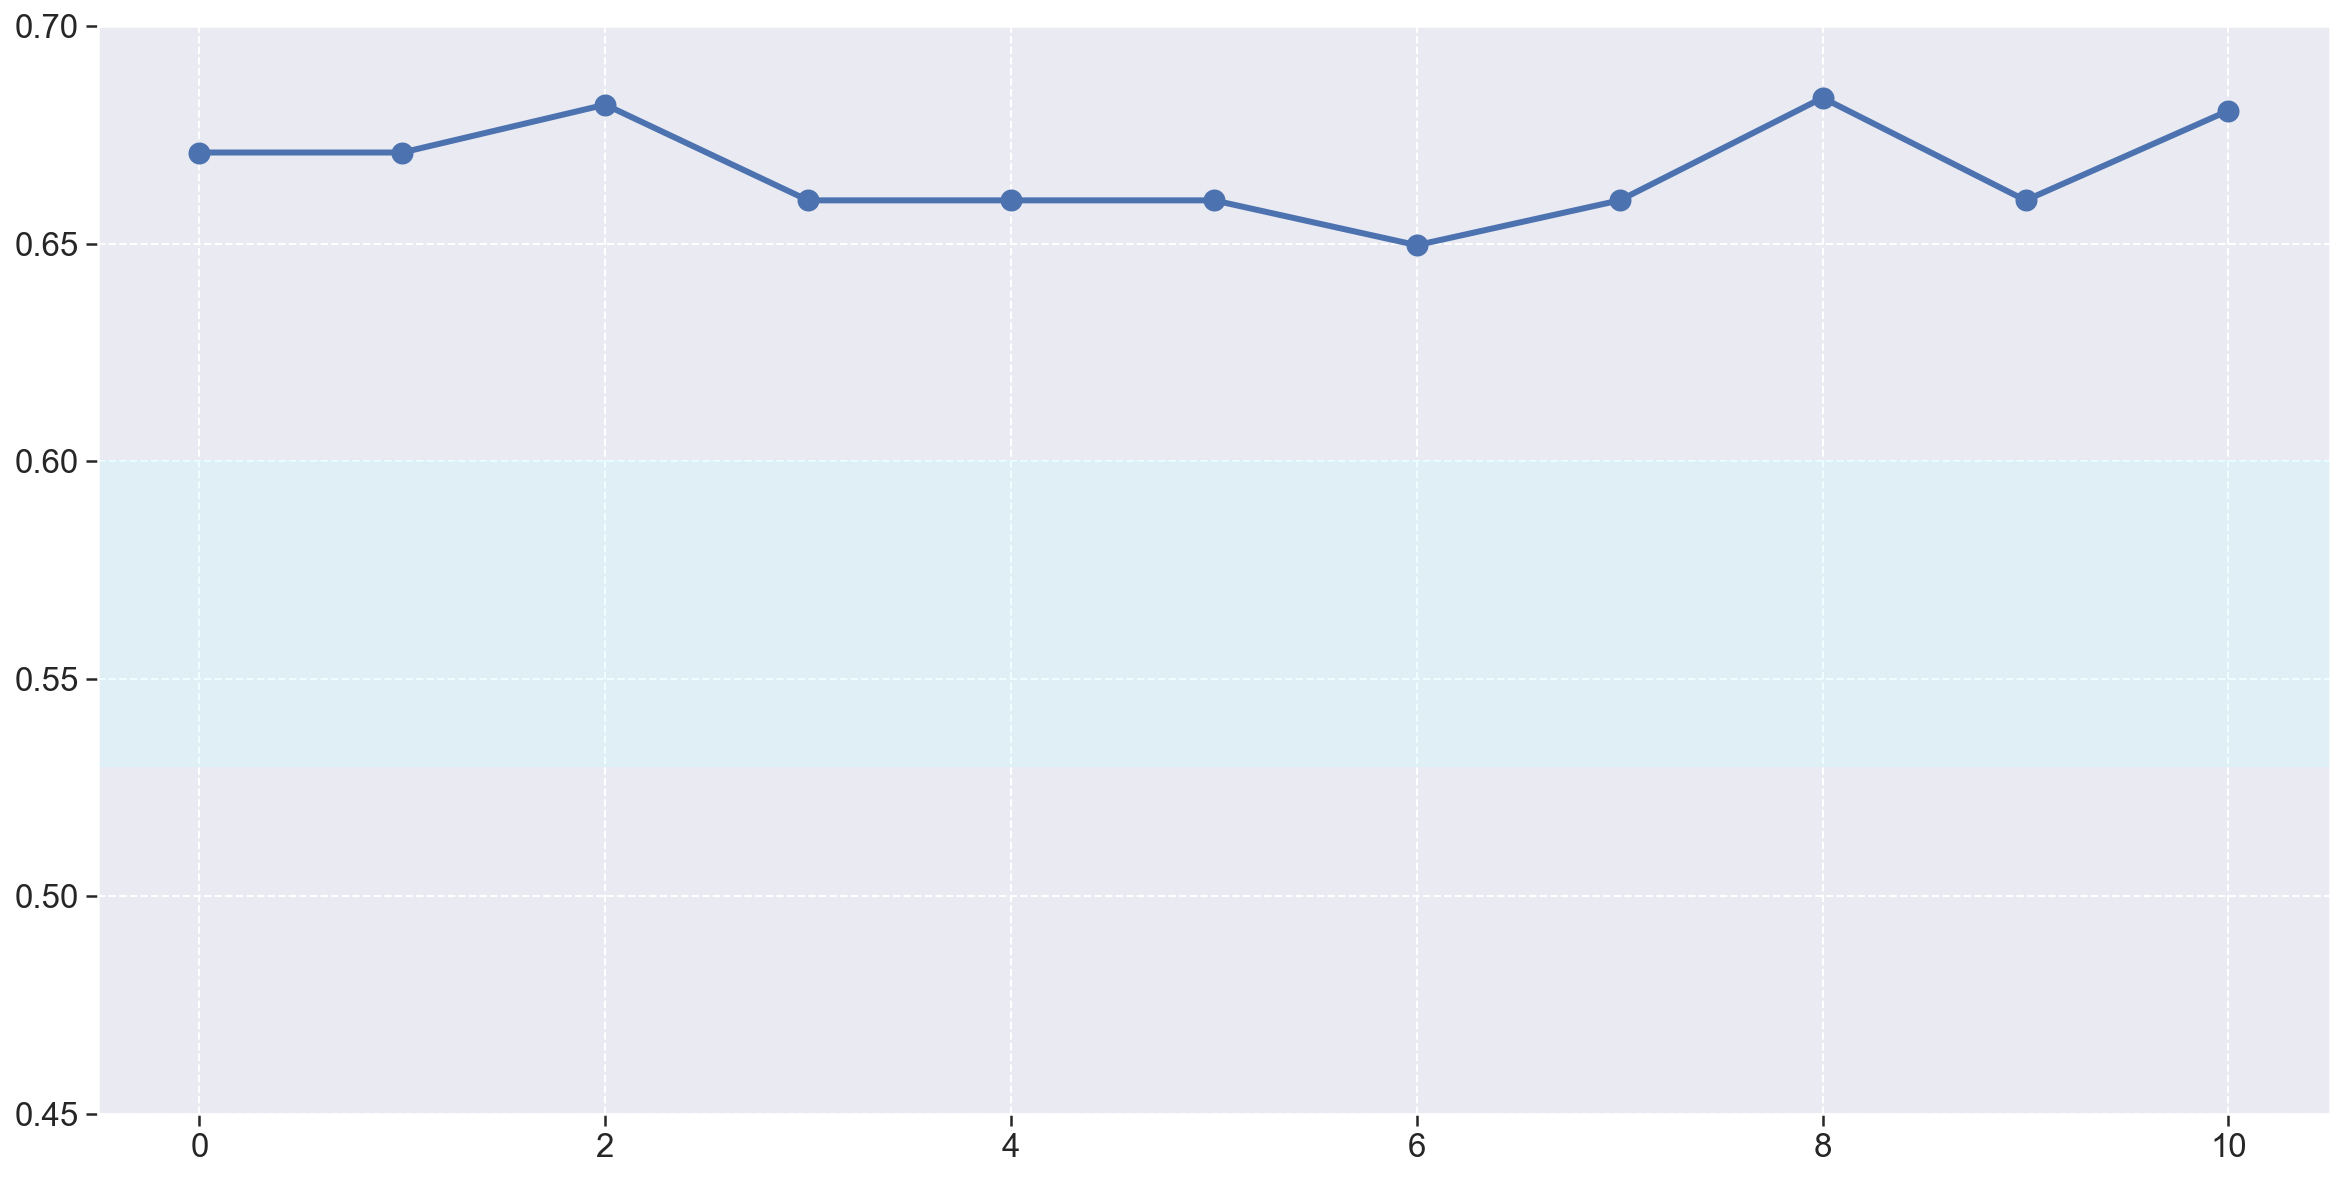

In [108]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["frontend"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

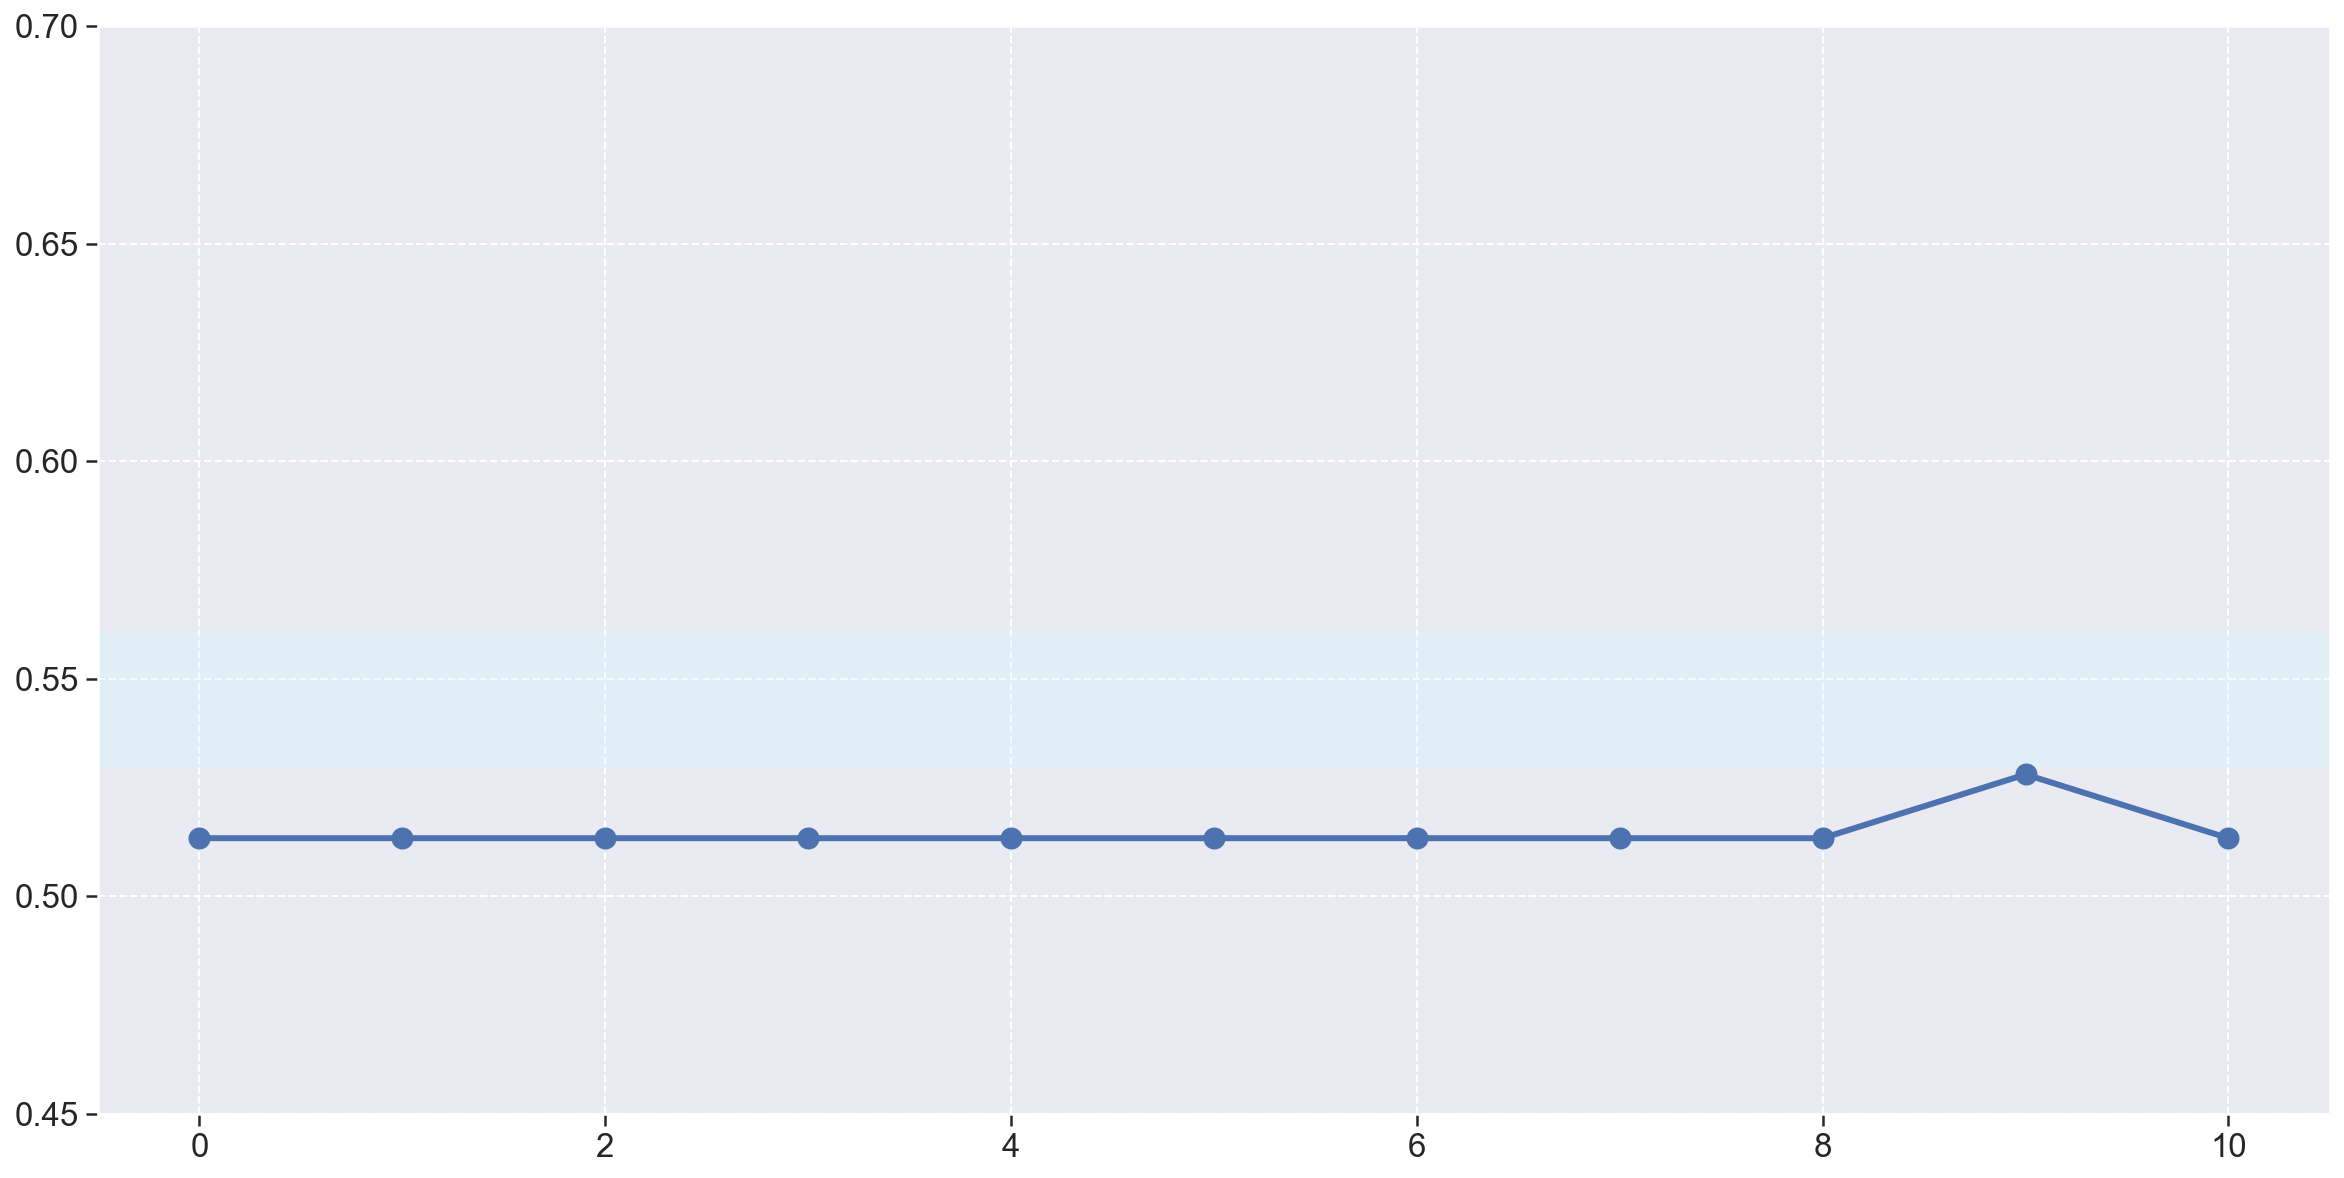

In [109]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["gateway"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.56, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

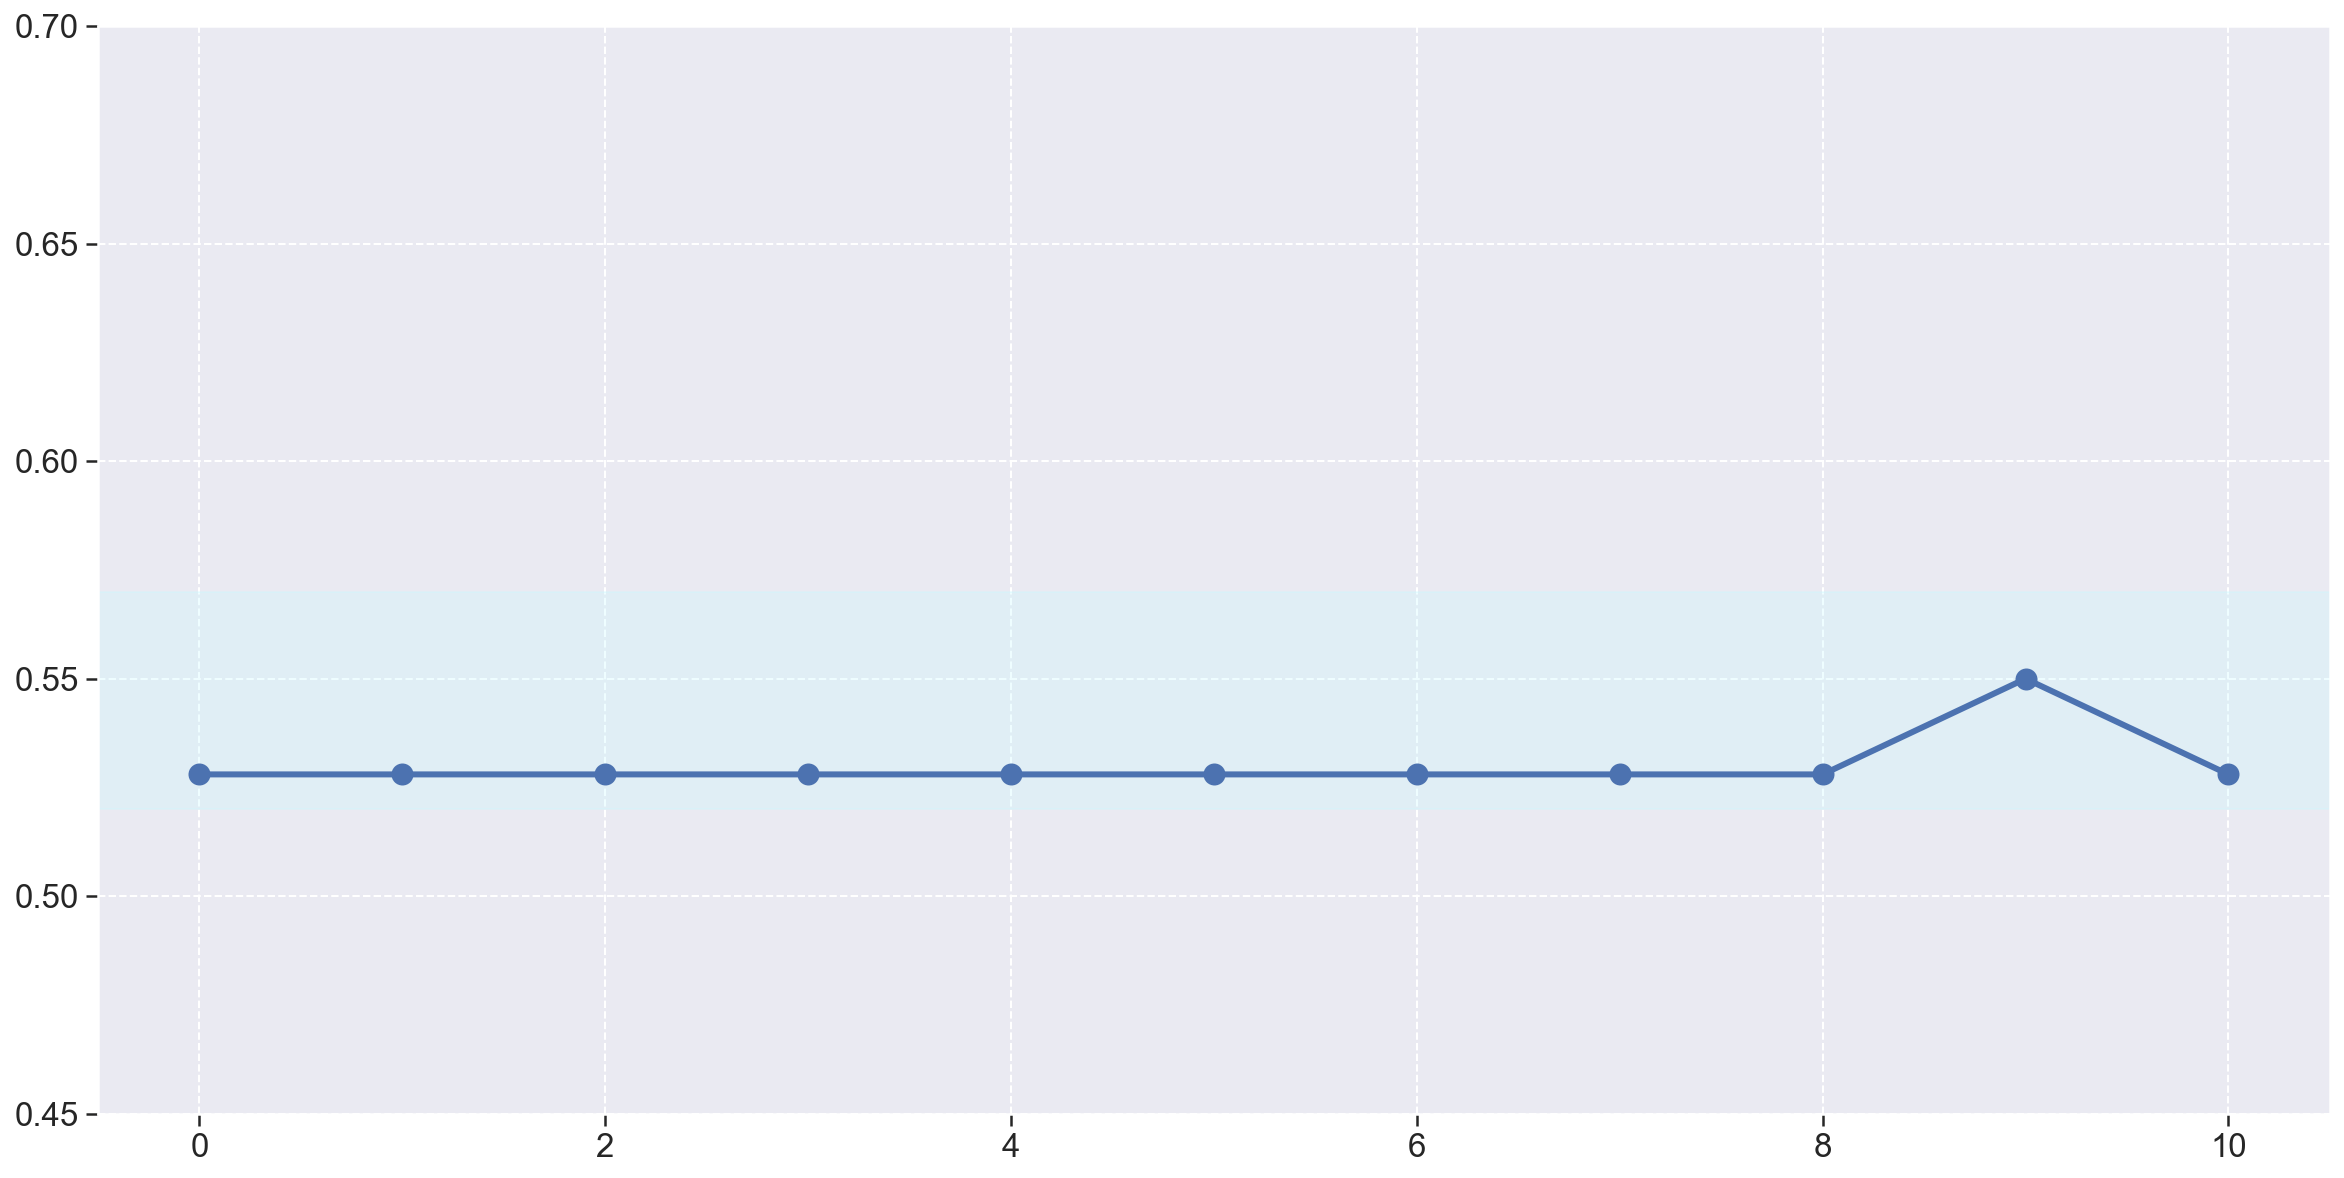

In [110]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["etl_tse"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.57, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

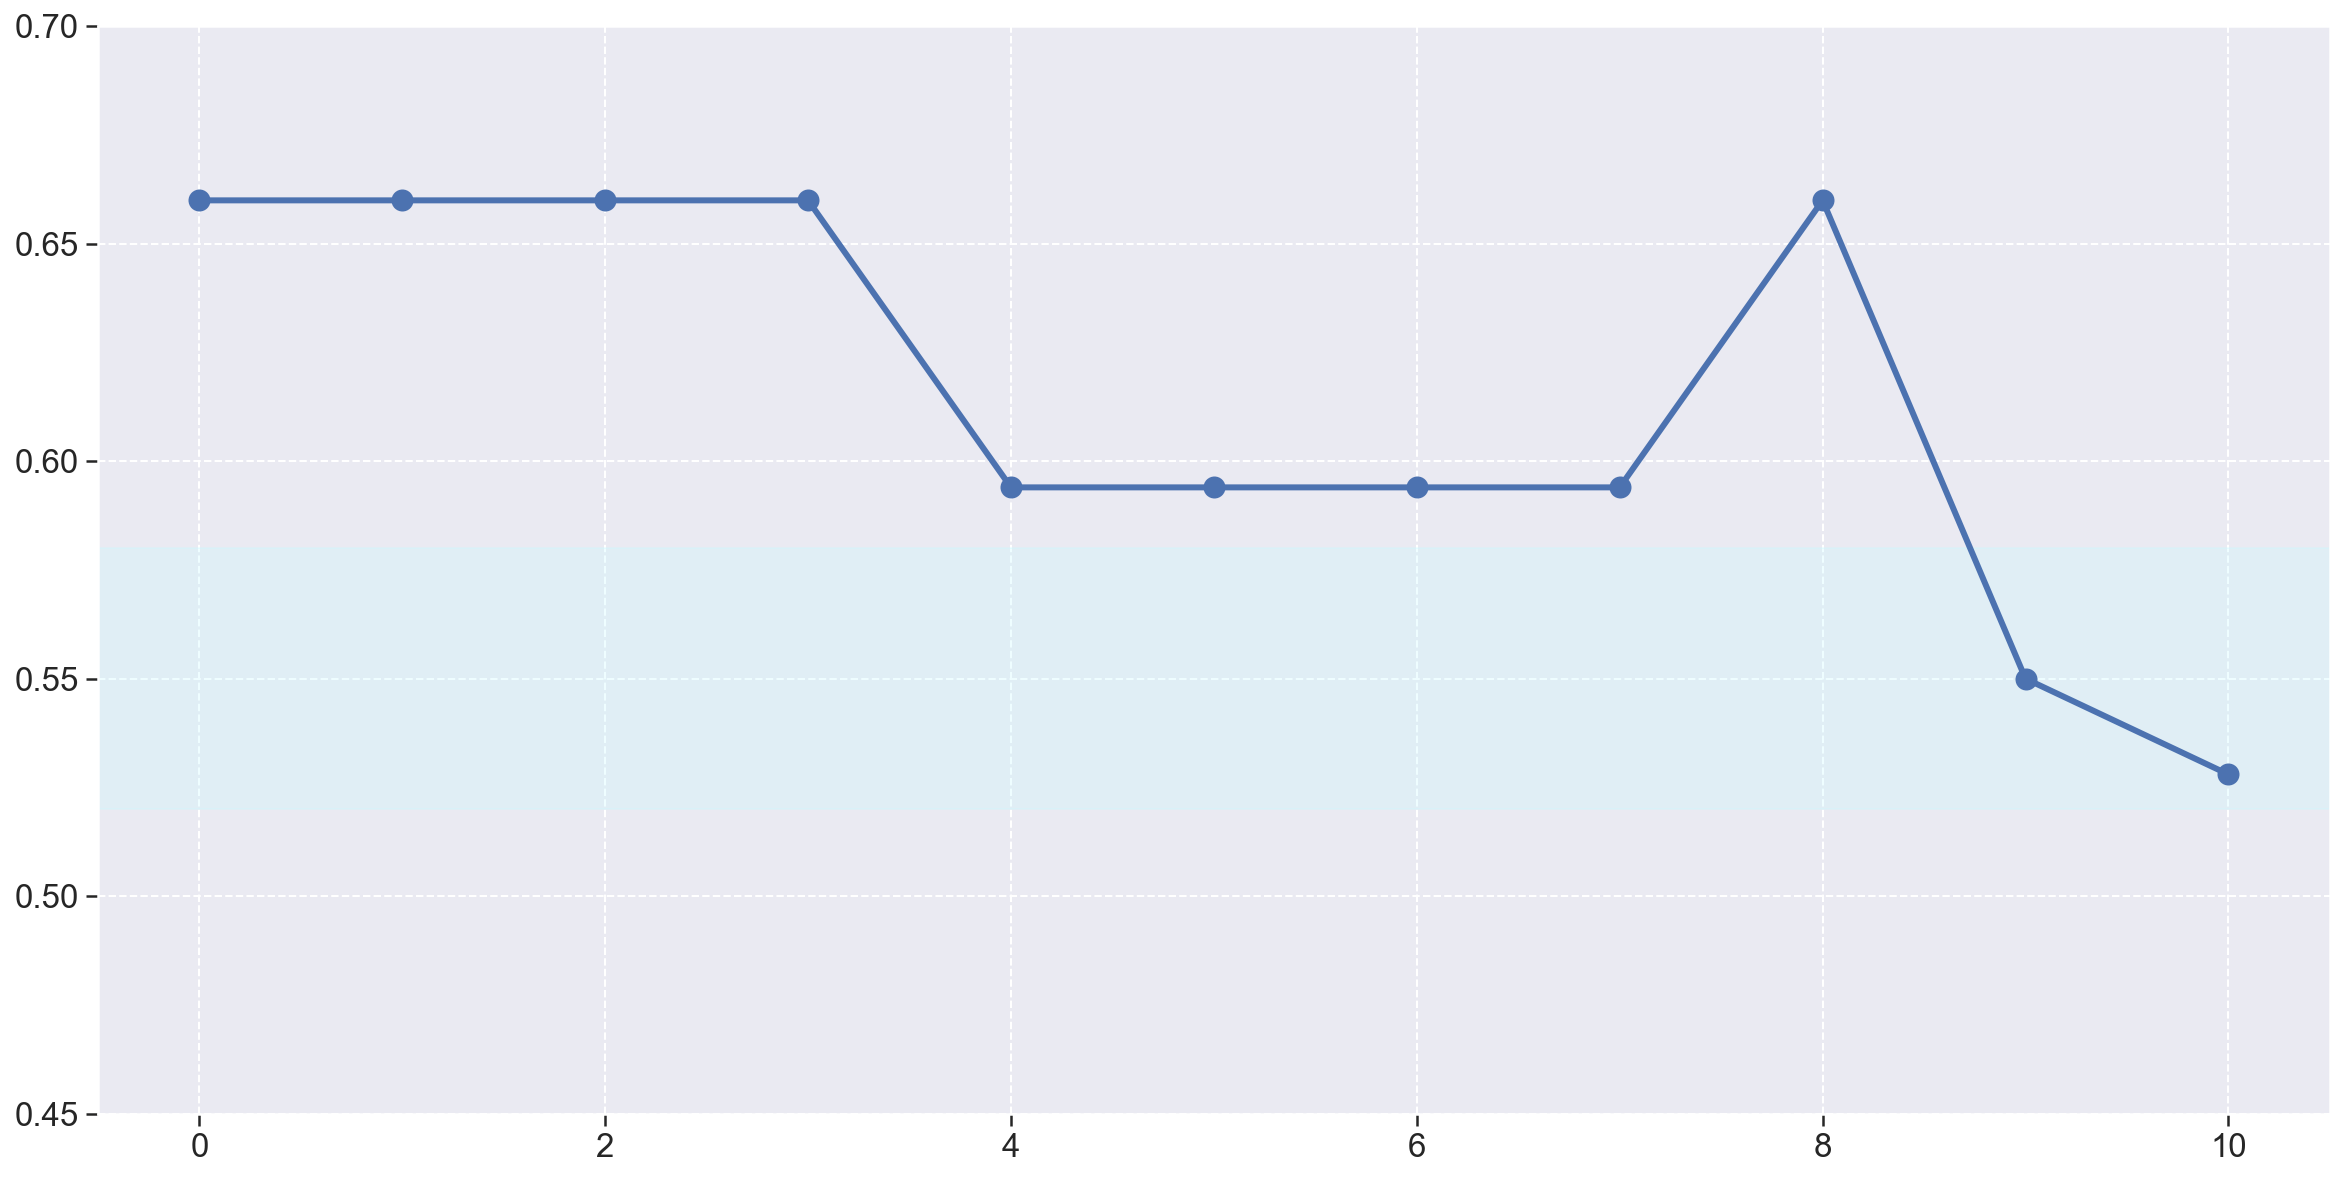

In [111]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["etl_twitter"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

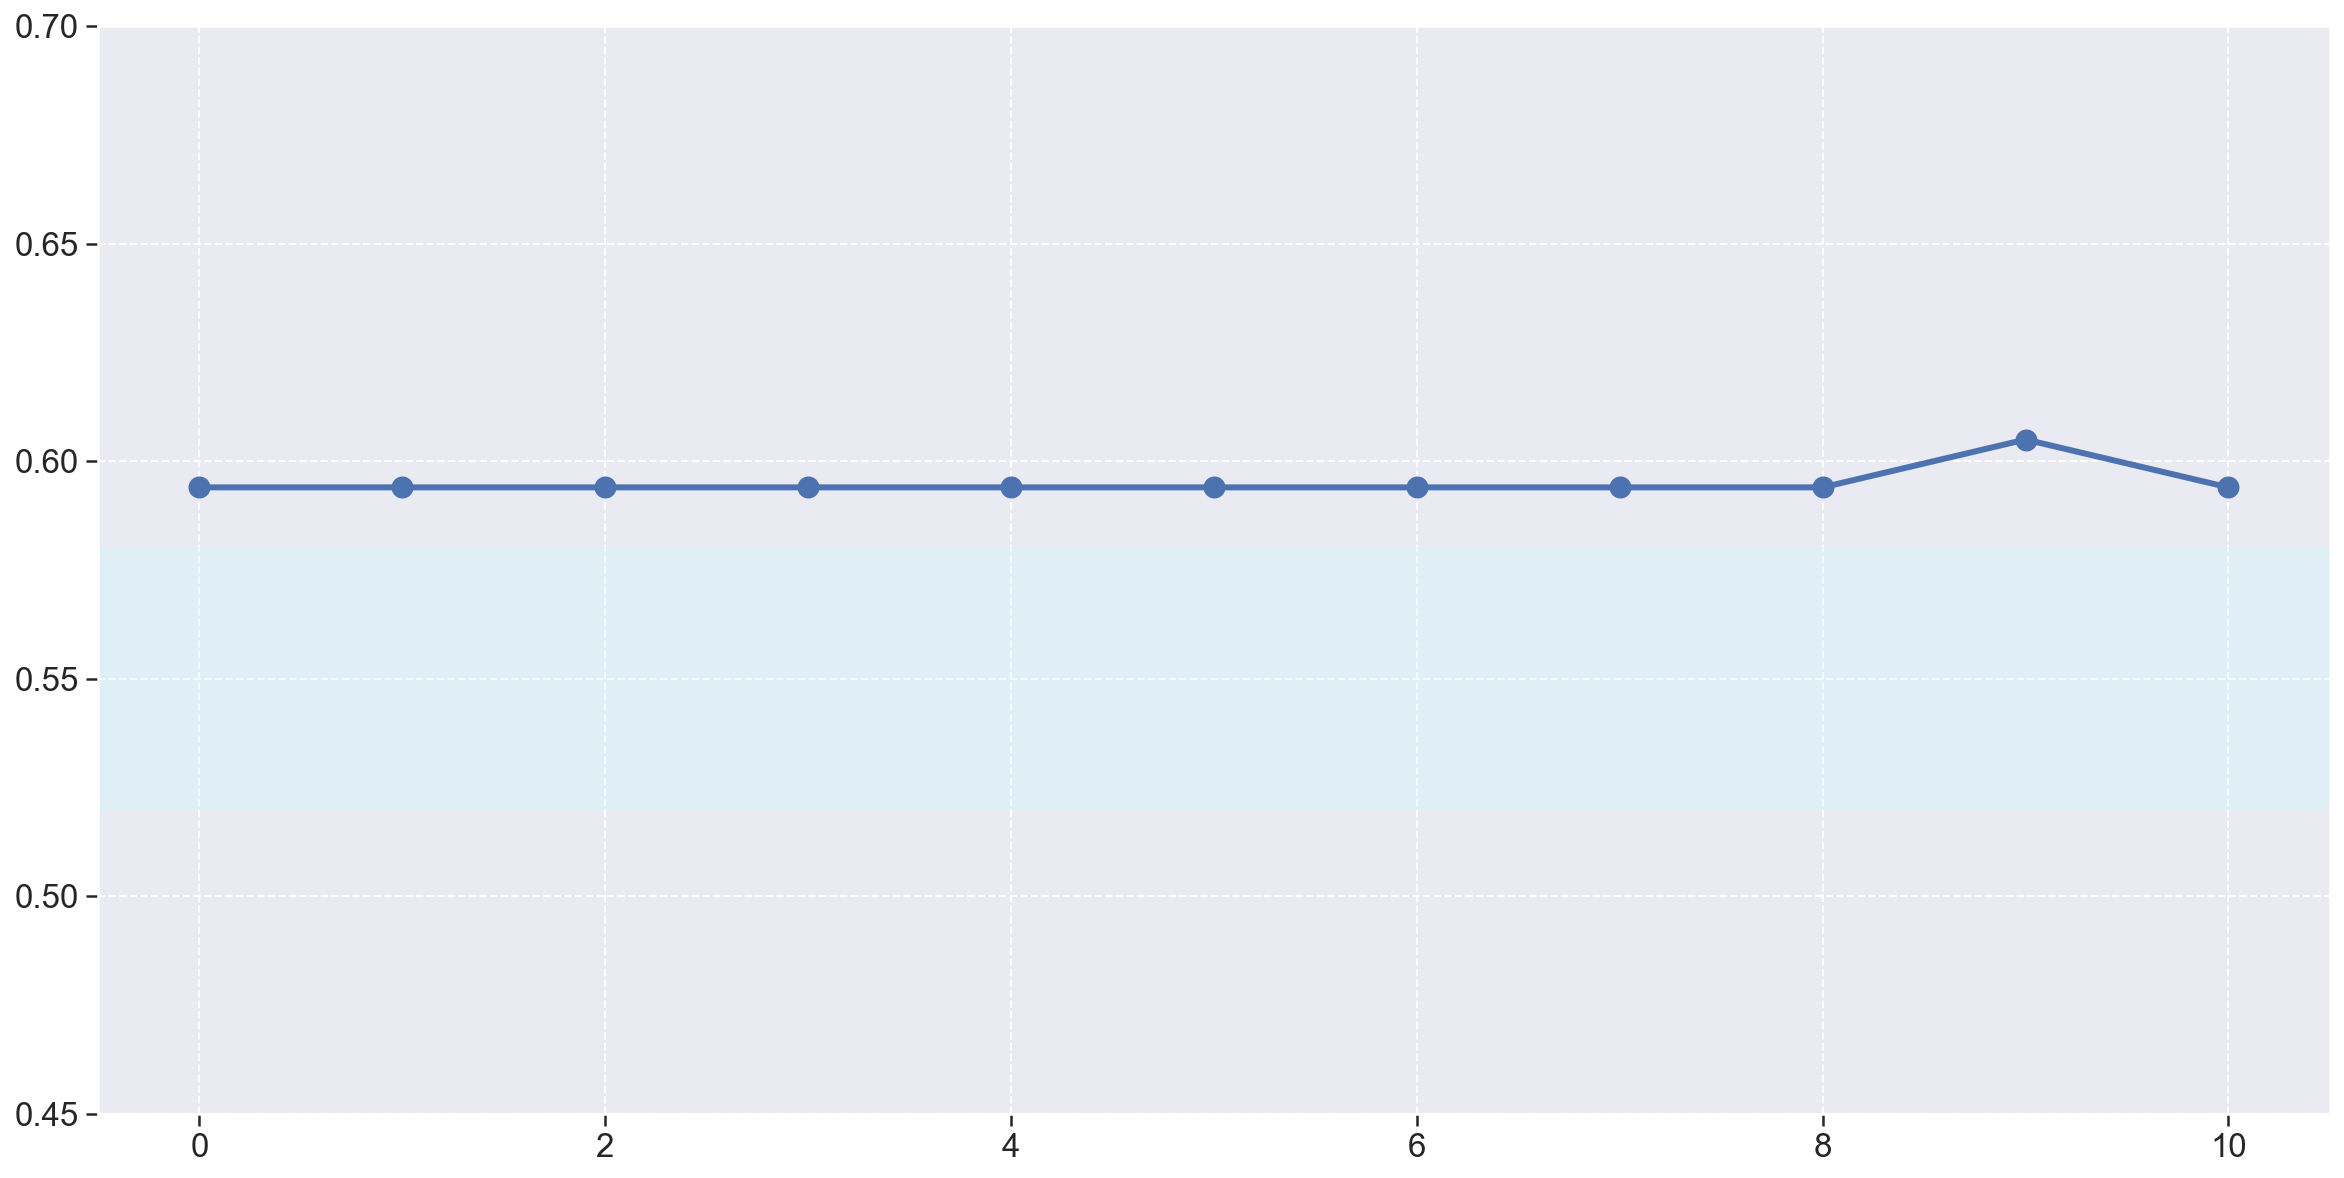

In [112]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["etl_camara"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

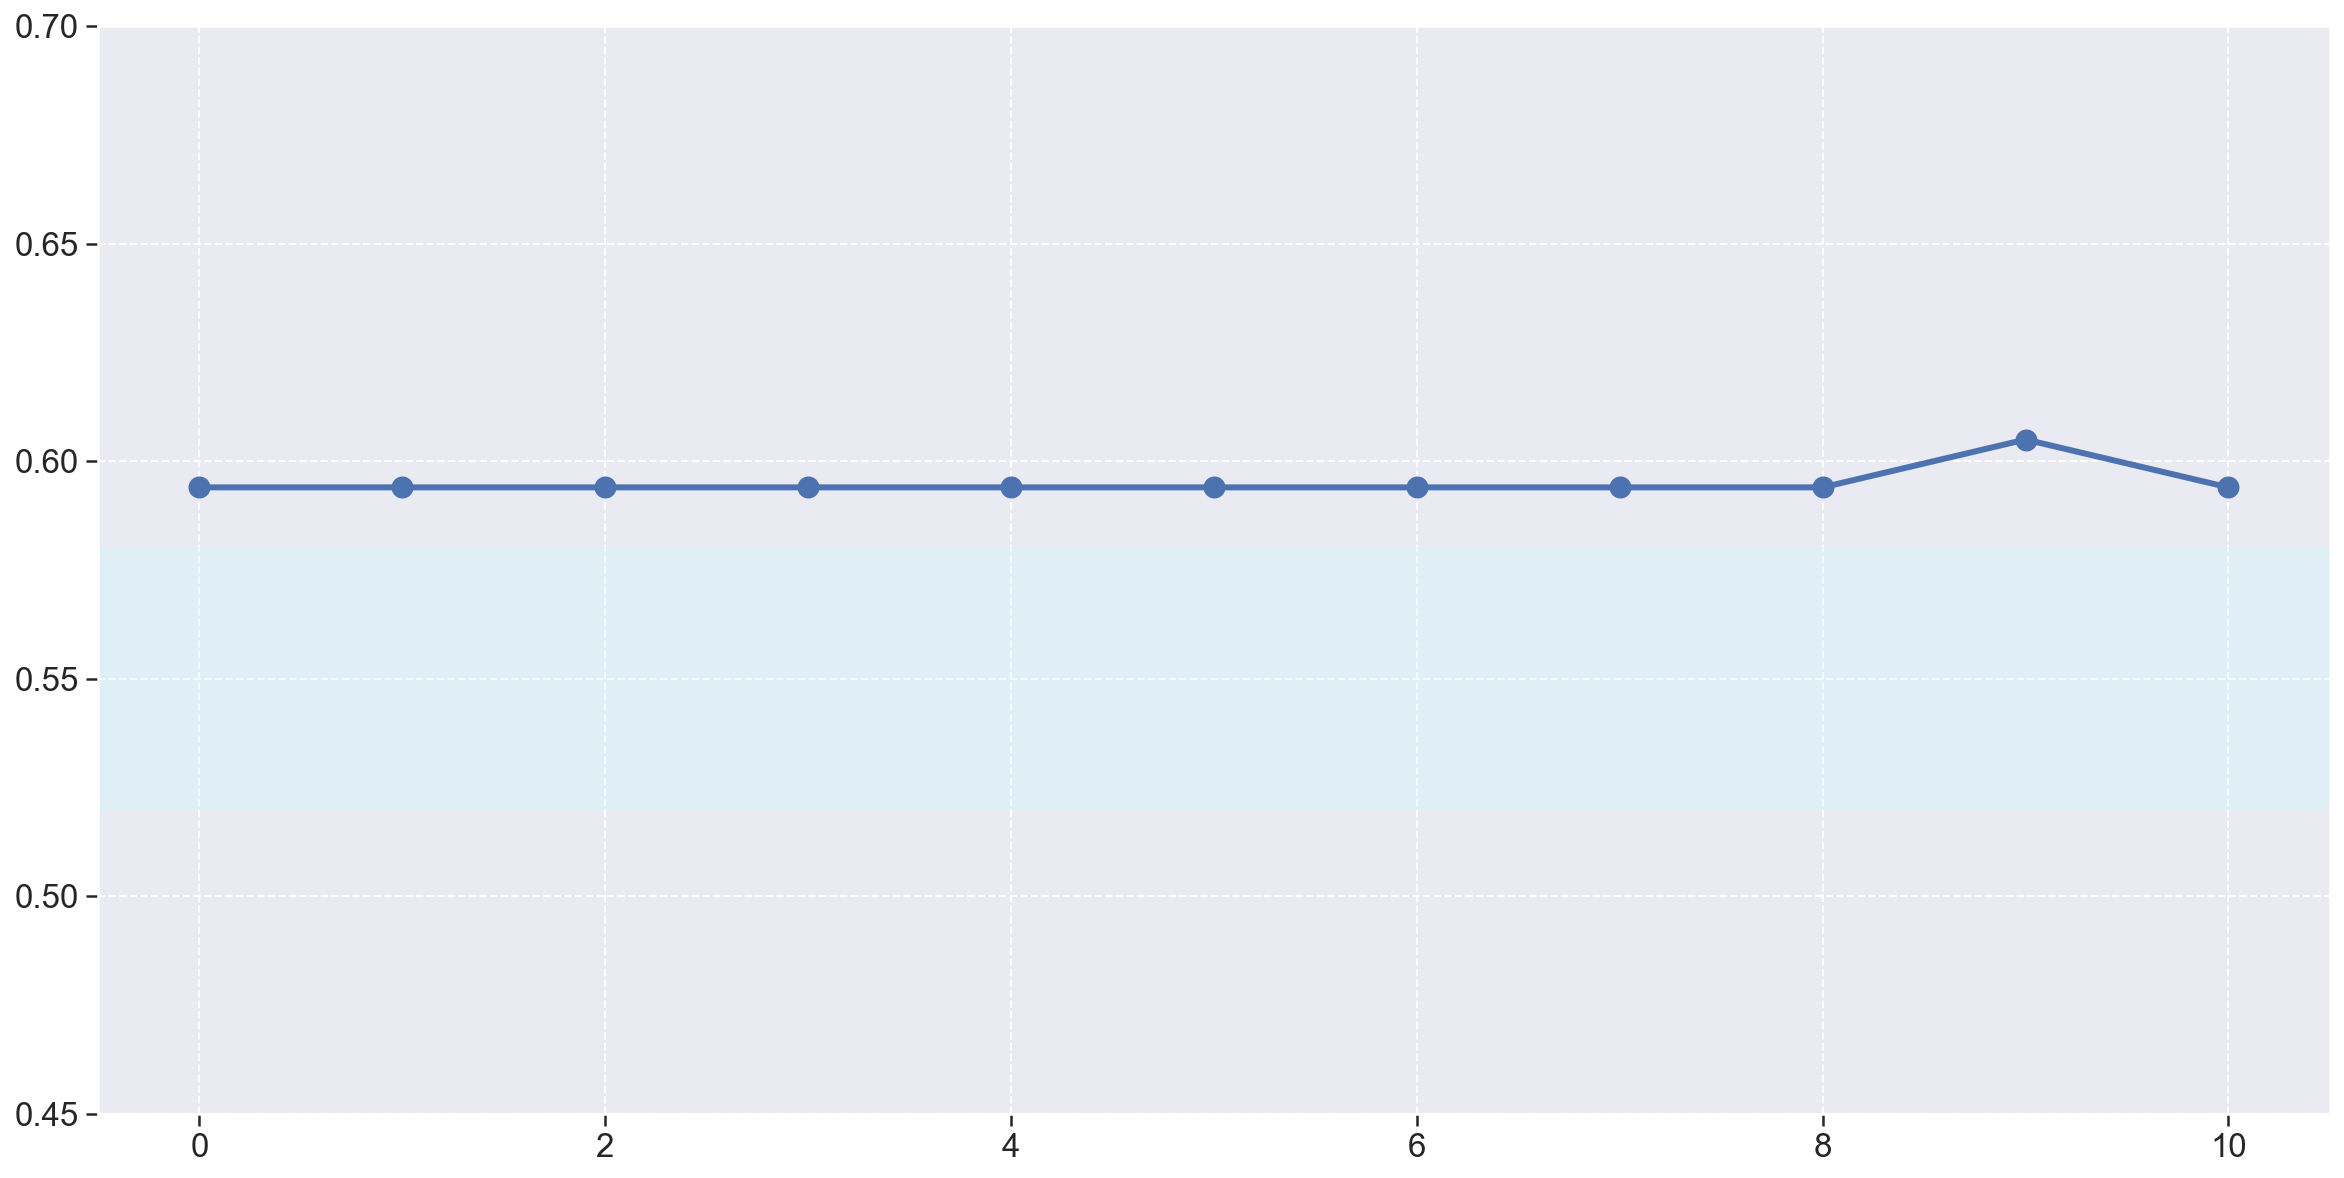

In [113]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["etl_news"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

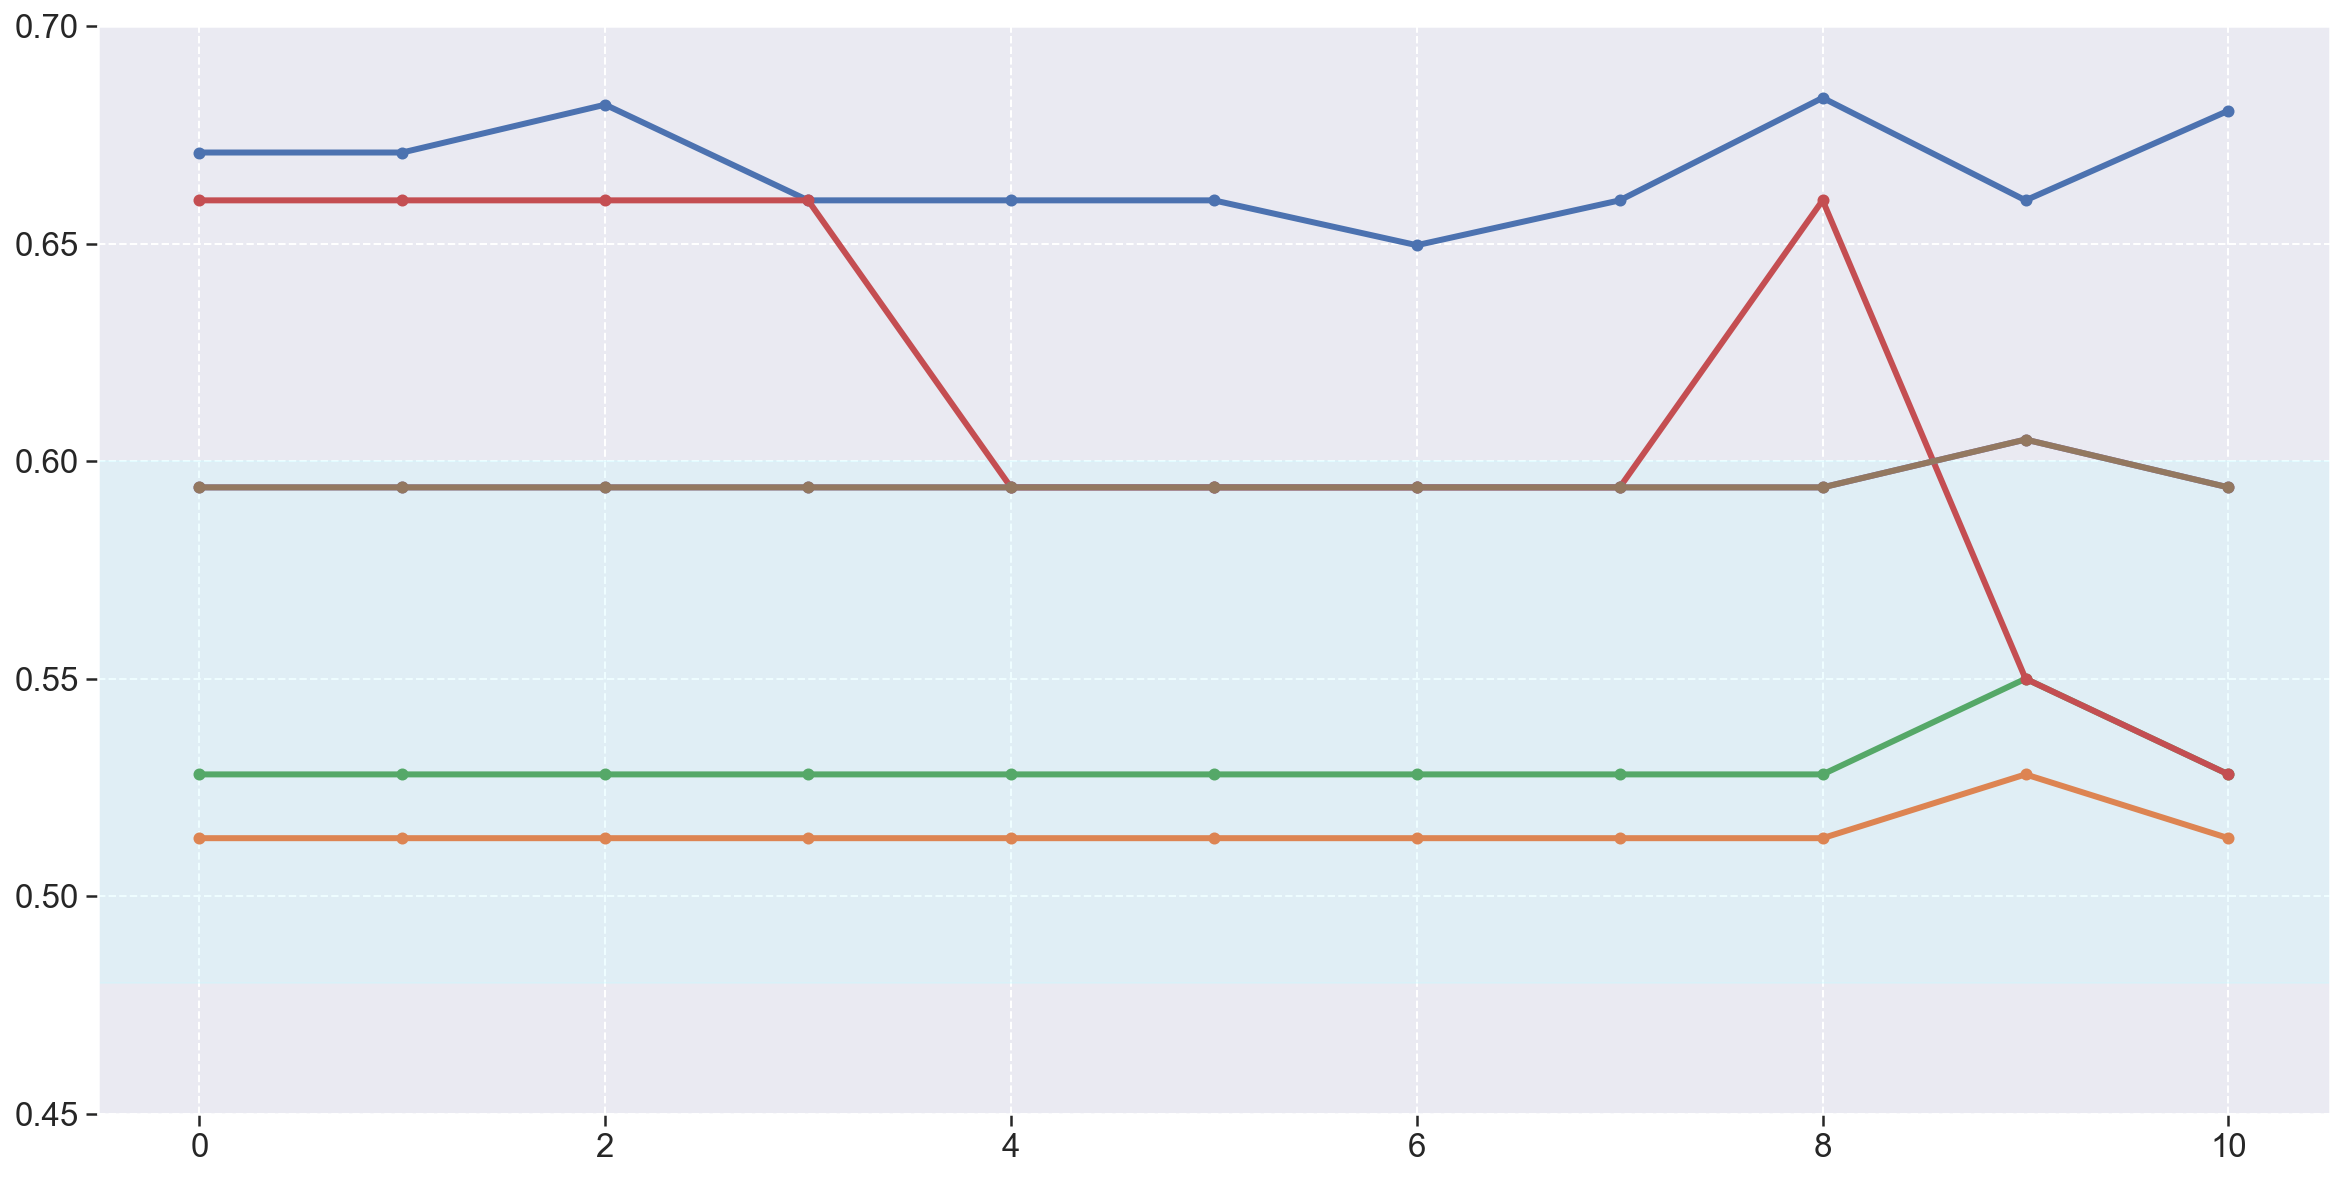

In [114]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repository_metrics["frontend"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["gateway"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["etl_tse"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["etl_twitter"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["etl_camara"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["etl_news"]['asc1'], linewidth=3, marker='o', markersize=5)

# Background color
plt.axhspan(.48,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

In [115]:
metrics_df = pd.concat([repository_metrics["frontend"],
                        repository_metrics["gateway"],
                        repository_metrics["etl_tse"],
                        repository_metrics["etl_twitter"],
                        repository_metrics["etl_camara"],
                        repository_metrics["etl_news"]], ignore_index=True)

In [116]:
metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [117]:
metrics_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.966667,0.066667,1.000000,frontend,01-05-2021,0.671000,0.671000,0.671000
1,0.966667,0.066667,1.000000,frontend,02-05-2021,0.671000,0.671000,0.671000
2,0.966667,0.100000,1.000000,frontend,04-05-2021,0.682000,0.682000,0.682000
3,0.968750,0.093750,0.937500,frontend,09-05-2021,0.660000,0.660000,0.660000
4,0.968750,0.093750,0.937500,frontend,09-05-2021(1),0.660000,0.660000,0.660000
5,0.968750,0.093750,0.937500,frontend,09-05-2021(2),0.660000,0.660000,0.660000
6,0.968750,0.062500,0.937500,frontend,10-05-2021,0.649687,0.649687,0.649687
7,0.971429,0.057143,0.971429,frontend,10-05-2021(1),0.660000,0.660000,0.660000
8,0.964286,0.107143,1.000000,frontend,18-04-2021,0.683571,0.683571,0.683571
9,0.972973,0.054054,0.972973,frontend,19-05-2021,0.660000,0.660000,0.660000


In [118]:
metrics_df.to_excel('data/fga-eps-mds-2020-2-data/parlamentaqui/qrapids-parlamentaqui-dataset-23-03-2021-24-05-2021-xlsx.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2020-2-data/parlamentaqui/qrapids-parlamentaqui-dataset-23-03-2021-24-05-2021-csv.csv', header=False, index = False)